# **Project Name**    -  Health Insurance Cross Sell  Prediction

##### **Project Type**    - Classification Project
##### **Contribution**    - Health Insurance Cross Sell Prediction
##### **Team Member 1 -** Saksham Gupta


# **Project Summary -**

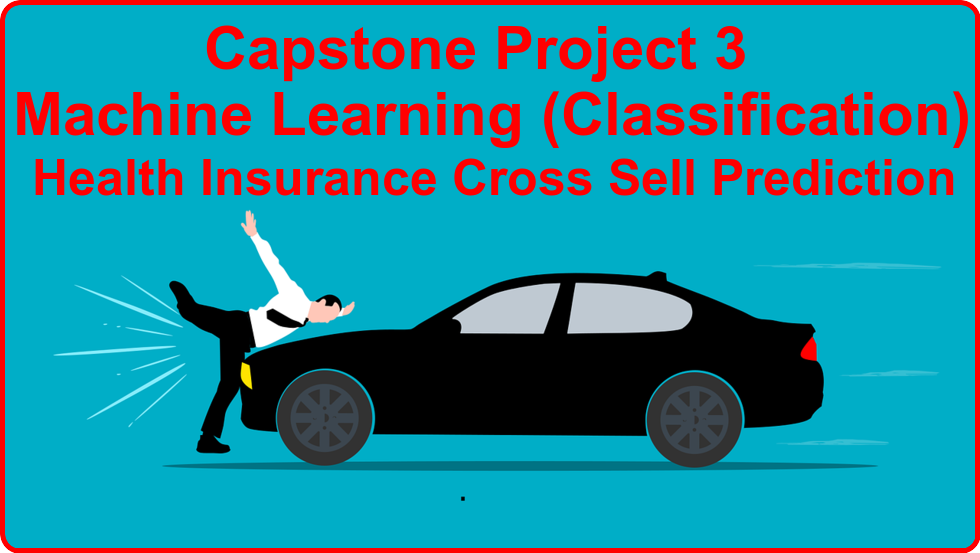

We obtained the Healthcare dataset from Almabetter for our capstone project, focusing on a Classification Machine Learning algorithm. This dataset comprises 381,109 rows and 12 columns.

For this project, we received a CSV dataset to facilitate the creation of a Machine Learning model. Following a thorough comprehension of the dataset, we engaged in data wrangling and feature engineering.

After preparing the dataset, we conducted Univariate, Bivariate, and Multivariate analyses to gain insights into its characteristics.

To construct our Machine Learning model, we divided the dataset into a 70:30 split, with 30% reserved for testing. After this division, we performed data transformations and applied normalization techniques.

We initially experimented with Logistic Regression, Decision Trees, and Random Forest on the dataset. However, we achieved the highest accuracy using the Random Forest Machine Learning model.

# **GitHub Link -**

https://github.com/Saksham027/DataClassification-Health_Insurance_Cross_Sell_prediction

# **Problem Statement**


There exists a type of insurance known as vehicle insurance, where customers are required to pay an annual premium to an insurance provider company. In the unfortunate event of a vehicle-related accident, this insurance provider company would offer compensation, referred to as the 'sum assured,' to the customer.

Creating a predictive model to determine whether a customer would express interest in Vehicle Insurance is of significant benefit to the company. Such a model allows the company to strategically plan its communication efforts towards these potential customers, optimizing its business model and revenue.

Now, for the purpose of predicting customer interest in Vehicle Insurance, you possess information about various aspects, including demographics (such as gender, age, and region code type), details related to the vehicles (Vehicle Age and Damage), and policy-related information (Premium and sourcing channel), among others.

# **Business Context**

Our client is an Insurance company that has provided Health Insurance to its customers now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

 For example, he pays a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance.



# **Dataset**

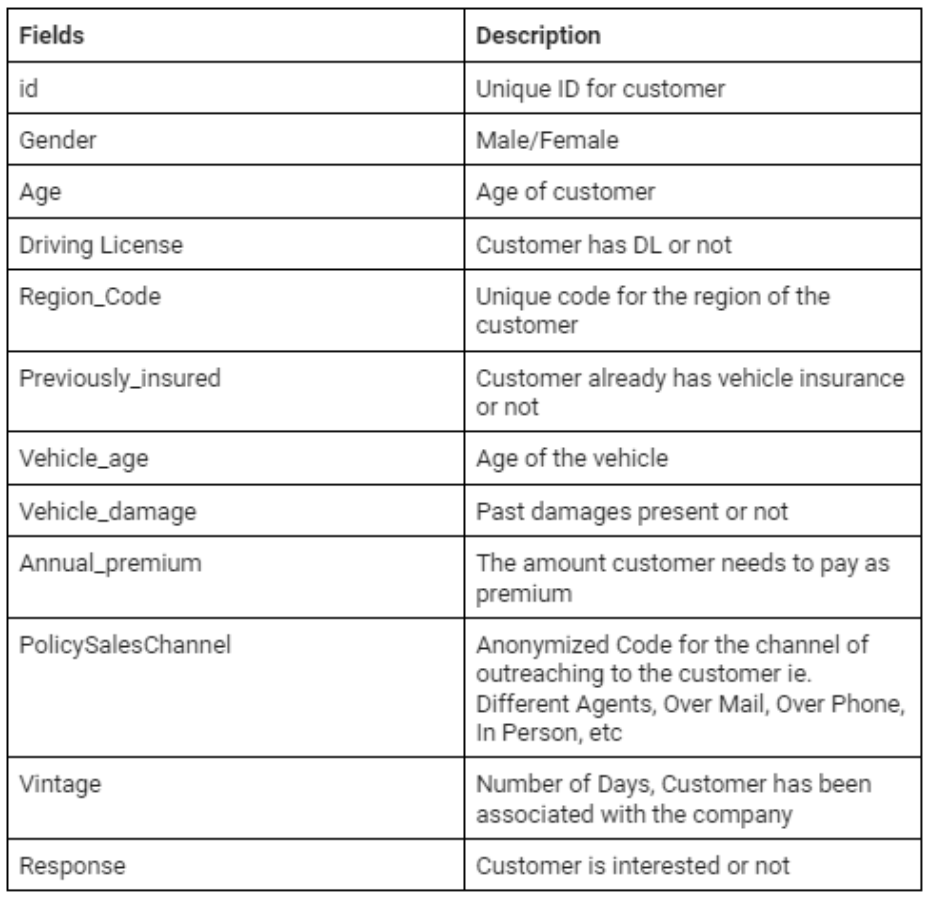

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #This will ignore all DeprecationWarning warnings in your code.

Machine Learning libraries

In [2]:
# import Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import pickle
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

## ***1. Know Your Data***

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
datafile = pd.read_csv("/content/drive/MyDrive/Projects/DataClassification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [5]:
# Dataset First Look
datafile.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
datafile.shape

(381109, 12)

### Dataset Information

In [7]:
# Dataset Info
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
datafile.duplicated().value_counts()

False    381109
dtype: int64

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
datafile.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

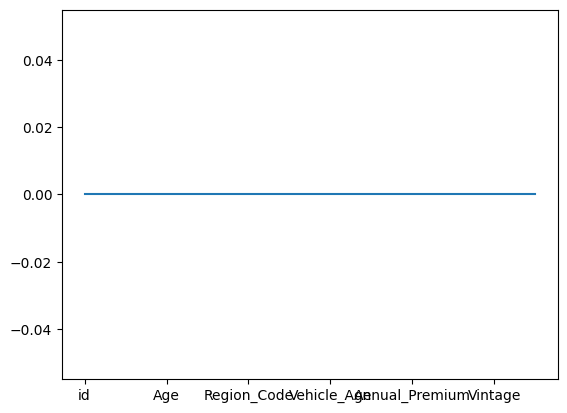

In [10]:
# Visualizing the missing values
datafile.isnull().sum().plot()

### What did you know about your dataset?

Our dataset contain 381109  rows and 12 columns with zero null values and it has no duplicated rows and it has 3 object columns and six integer three float columns.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
datafile.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
# Dataset Describe
datafile.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

The mean value of age, previously_insured,response columns have higher mean value than 50 percentile and remaining columns have lower mean  value than its 50 percentile so they are right skewed.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in range(0,len(datafile.columns)):
  print("\nunique items in columns no ",i+1, "are:")

  print(datafile.iloc[:,i].unique())



unique items in columns no  1 are:
[     1      2      3 ... 381107 381108 381109]

unique items in columns no  2 are:
['Male' 'Female']

unique items in columns no  3 are:
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

unique items in columns no  4 are:
[1 0]

unique items in columns no  5 are:
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

unique items in columns no  6 are:
[0 1]

unique items in columns no  7 are:
['> 2 Years' '1-2 Year' '< 1 Year']

unique items in columns no  8 are:
['Yes' 'No']

unique items in columns no  9 are:
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

unique items in columns no  10 are:
[ 26. 152. 160. 124.  14.  13.  30. 156.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
data = datafile.copy() #  We have made a copy of dataset to avoid any changes in the original dataset.

**Feature selected:** We have selected and dropped the columns = id , Region code.

In [15]:
data = data.drop(['id','Region_Code'],axis=1)

In [16]:
data['Vehicle_Age'] = data['Vehicle_Age'].str.strip('>,<,-,Year,Years')

In [17]:
data['Vehicle_Age'] = data['Vehicle_Age'].str.lstrip('1-,,')

In [18]:
data['Vehicle_Age'].unique()

array([' 2 ', '2 ', ' 1 '], dtype=object)

In [19]:
data['Vehicle_Age']=data['Vehicle_Age'].astype('int')

### What all manipulations have you done and insights you found?

In data wrangling

1- We drop the id and Region_code from the dataset

2-We striped unwanted character from Vehicle_age column and converted it to int type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Univariant analysis**

This is dist plot and its details are  Series([], Name: Age, dtype: int64) 



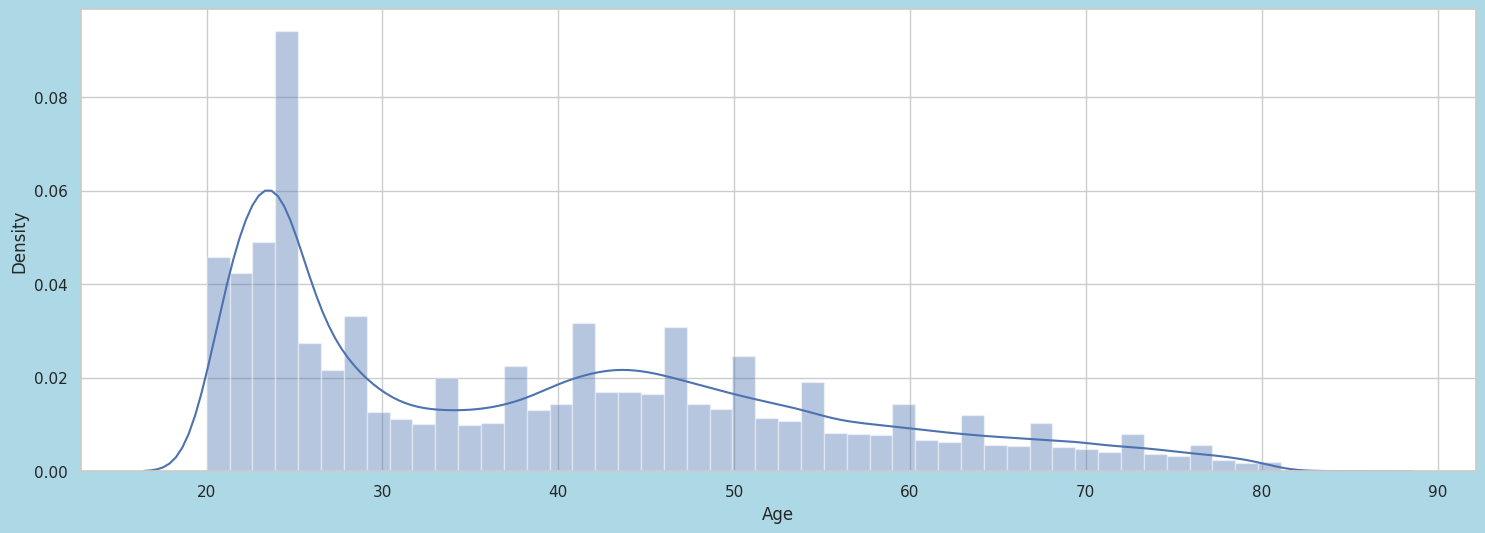

This is dist plot and its details are  Series([], Name: Driving_License, dtype: int64) 



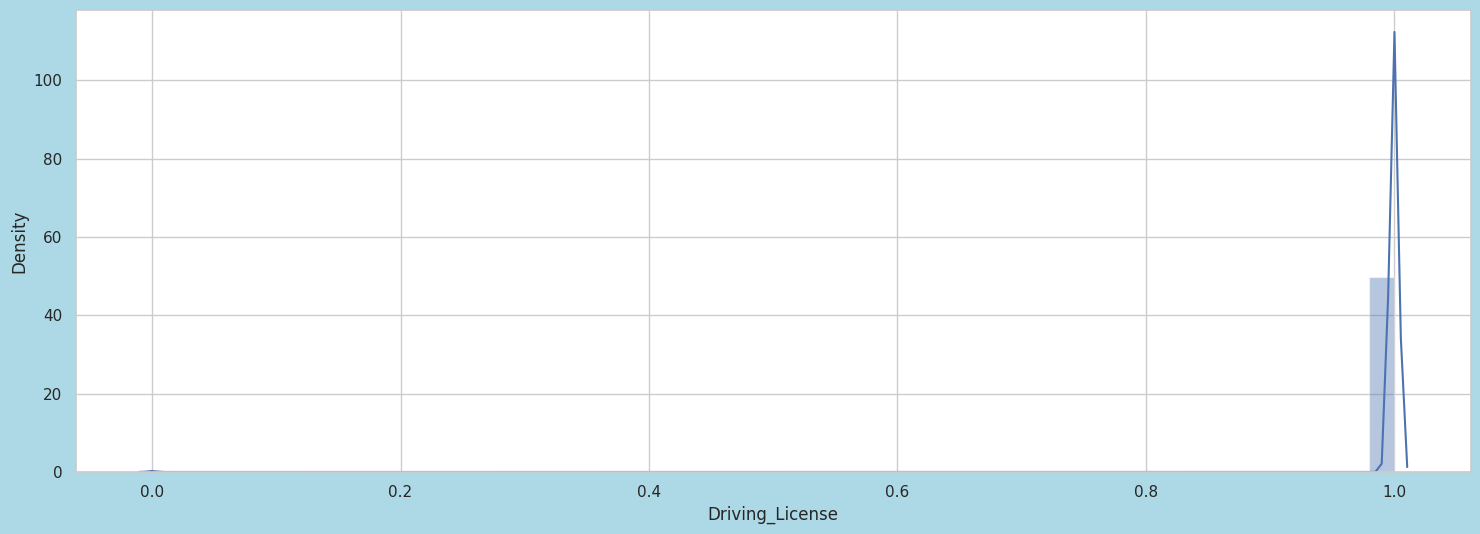

This is dist plot and its details are  Series([], Name: Previously_Insured, dtype: int64) 



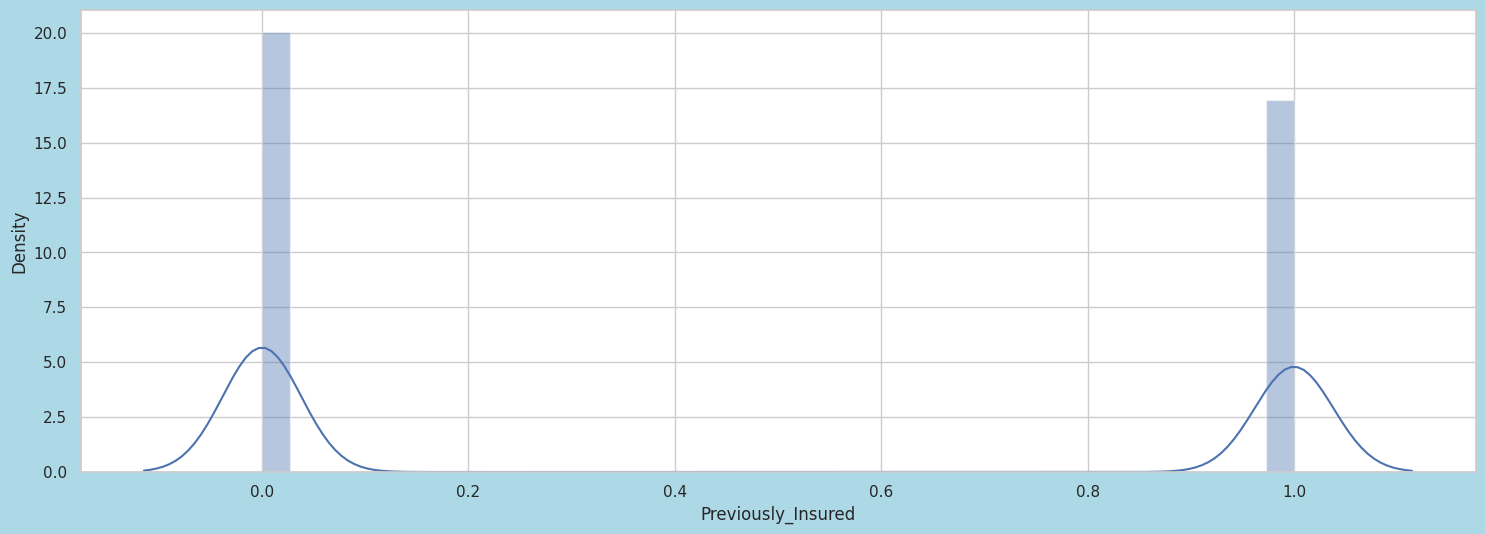

This is dist plot and its details are  Series([], Name: Vehicle_Age, dtype: int64) 



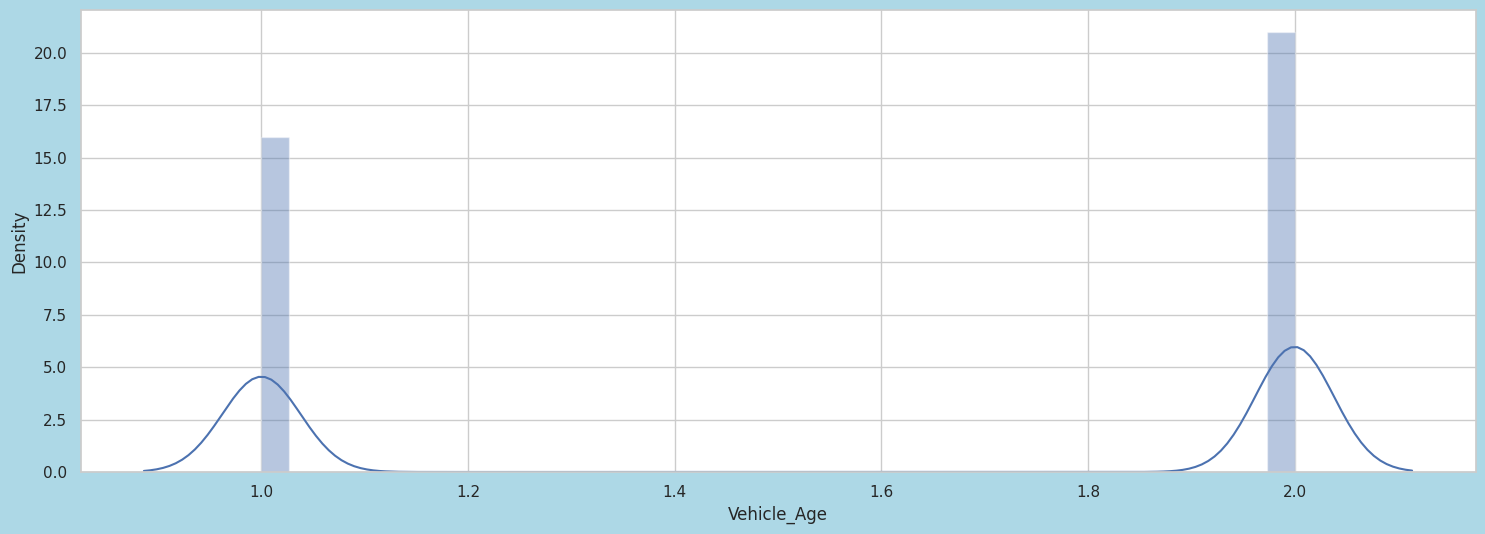

This is dist plot and its details are  Series([], Name: Annual_Premium, dtype: float64) 



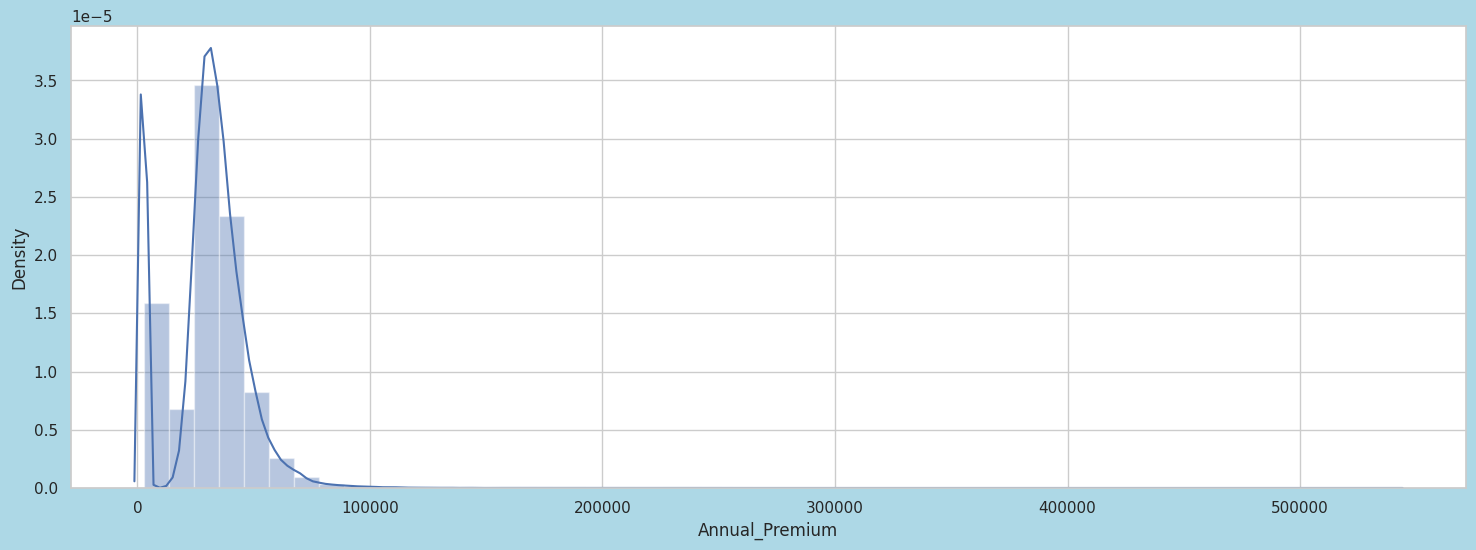

This is dist plot and its details are  Series([], Name: Policy_Sales_Channel, dtype: float64) 



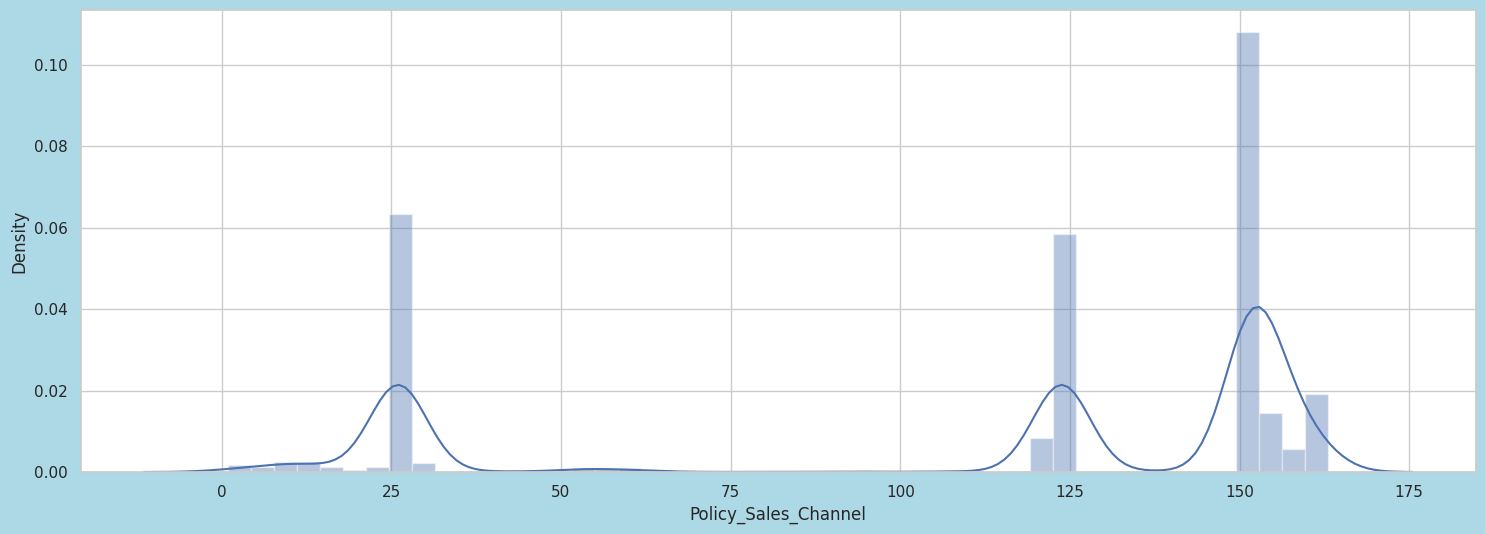

This is dist plot and its details are  Series([], Name: Vintage, dtype: int64) 



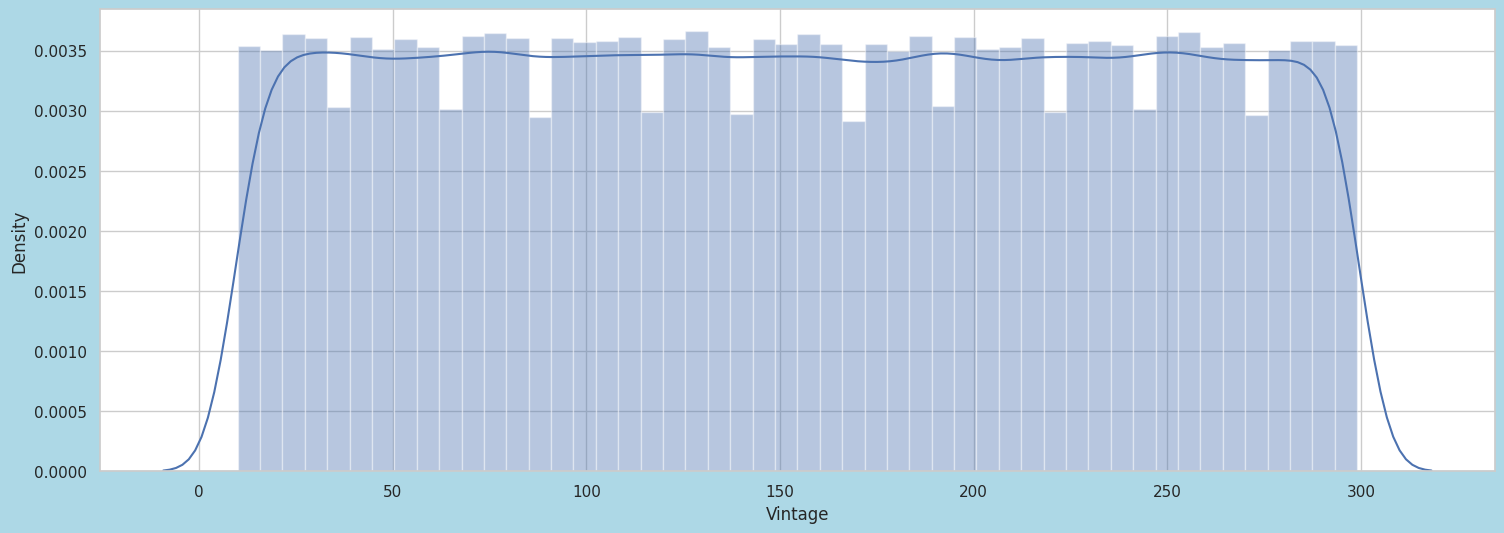

This is dist plot and its details are  Series([], Name: Response, dtype: int64) 



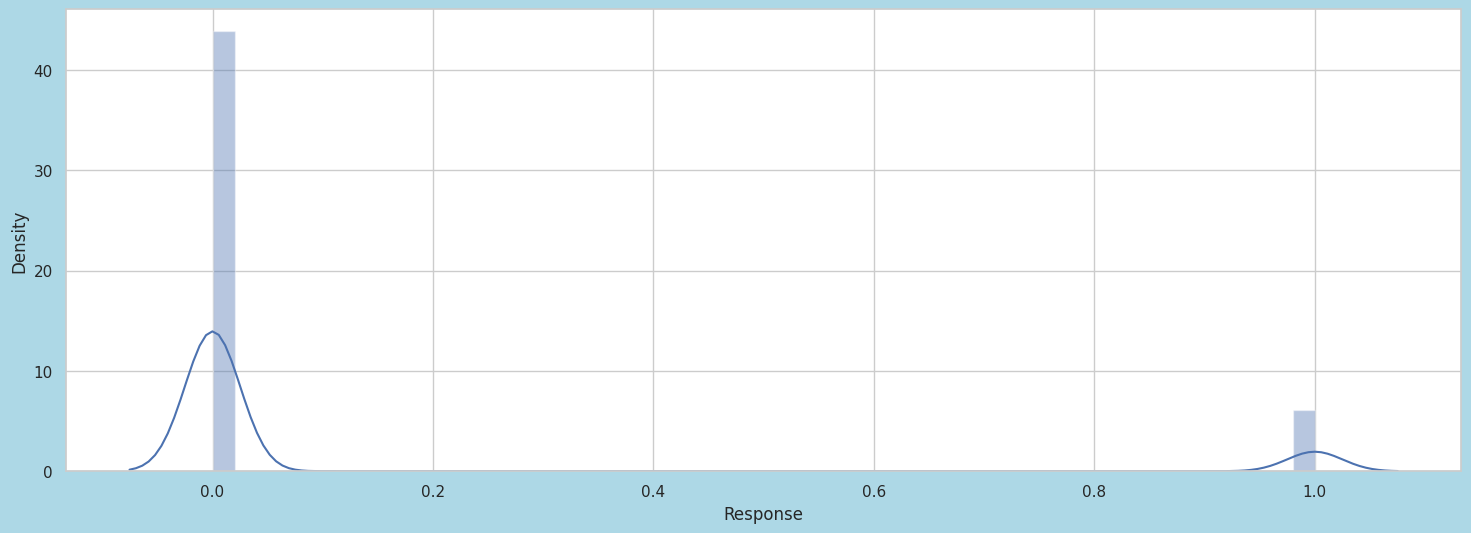

In [20]:
# Chart - 1 visualization code
for values in range(0,len(data.columns)):
  if np.issubdtype(data.iloc[:,values].dtype, np.number) == True:
    fig = plt.figure(figsize=(18,6))
    sns.set(style='whitegrid')
    fig.set_facecolor("lightblue")
    plt.title(print("This is dist plot and its details are ",data.iloc[0:0,values],'\n'))
    sns.distplot(data.iloc[:,values])
    plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. The Distplot depicts the data by a histogram and a line in combination to it.

##### 2. What is/are the insight(s) found from the chart?

The mean value of age, previously_insured,response columns have higher mean value than 50 percentile and remaining columns have lower mean  value than its 50 percentile so they are right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can see the performance of individual column if the data gathered is up to the desired remarks.

#### Chart - 2

Box plot - To check outliers

This is Box plot and its details are  Series([], Name: Age, dtype: int64) 



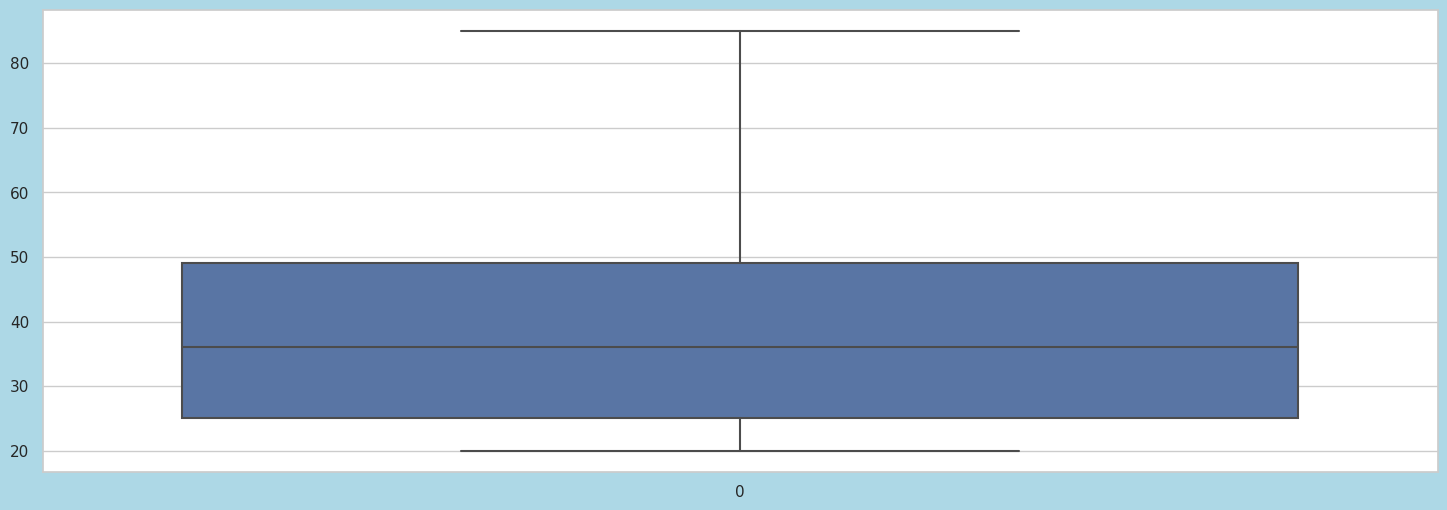

This is Box plot and its details are  Series([], Name: Driving_License, dtype: int64) 



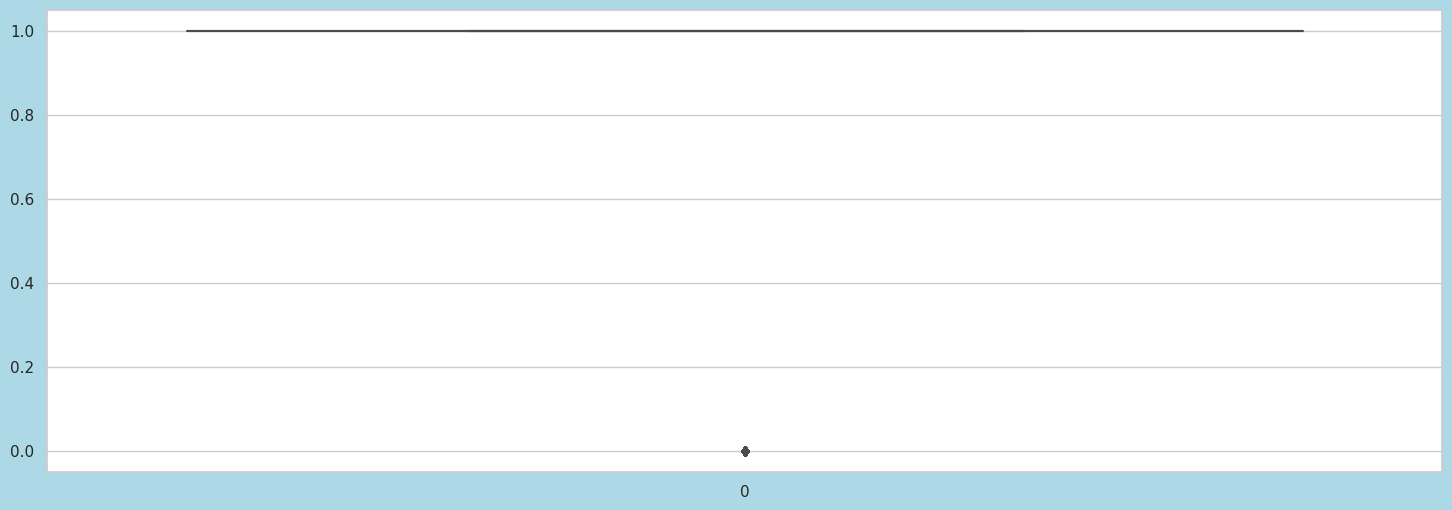

This is Box plot and its details are  Series([], Name: Previously_Insured, dtype: int64) 



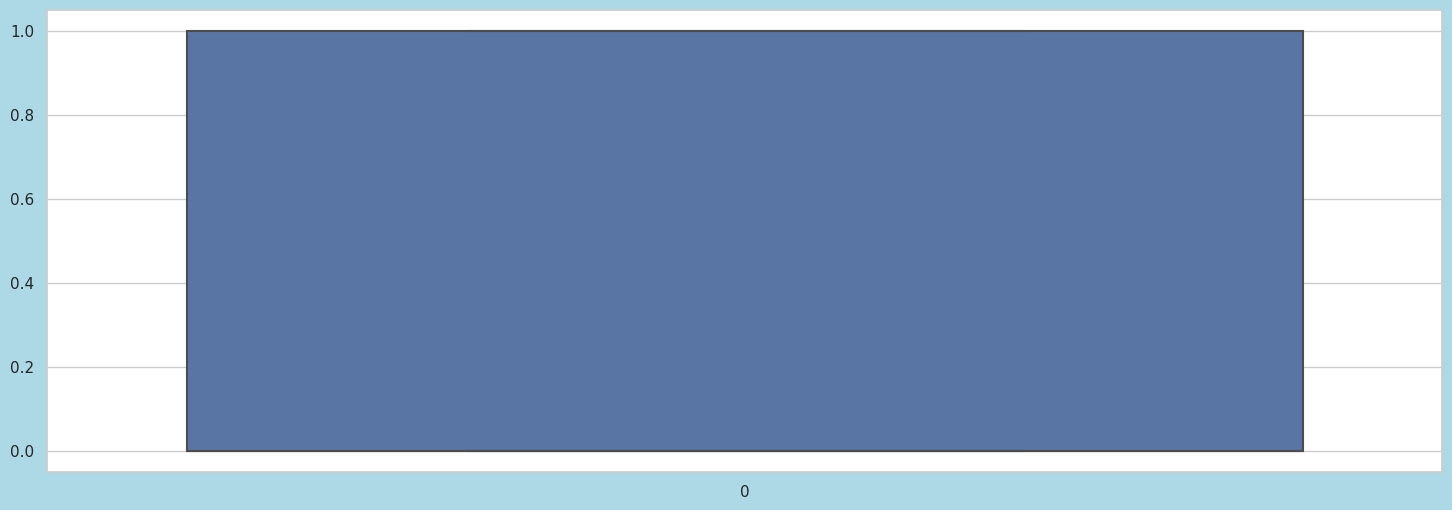

This is Box plot and its details are  Series([], Name: Vehicle_Age, dtype: int64) 



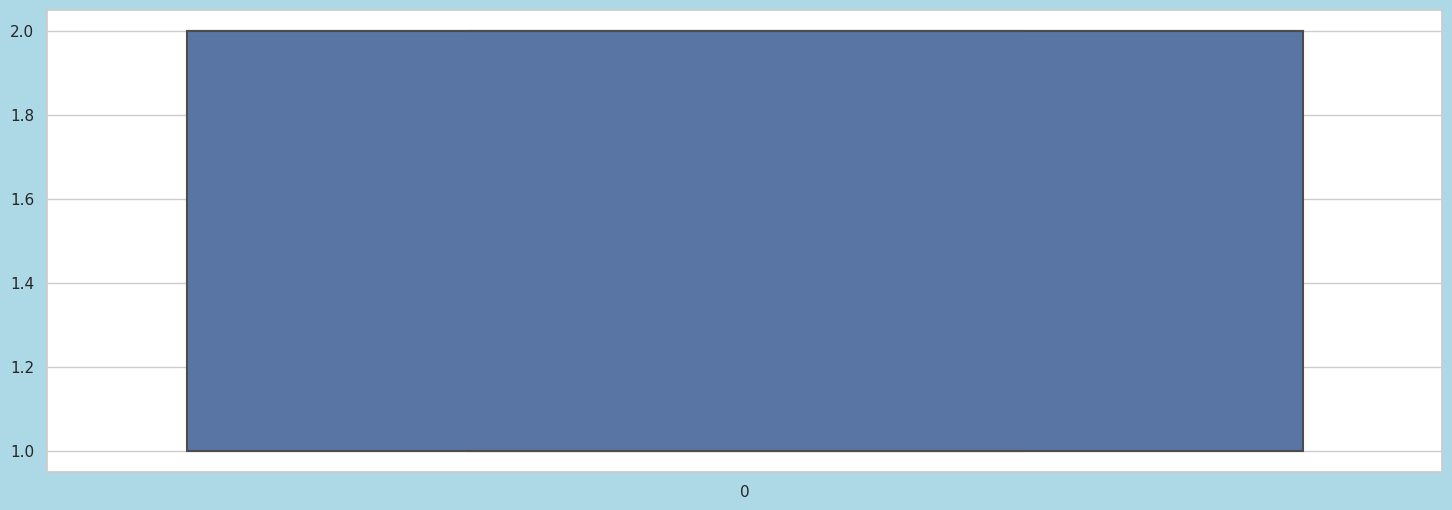

This is Box plot and its details are  Series([], Name: Annual_Premium, dtype: float64) 



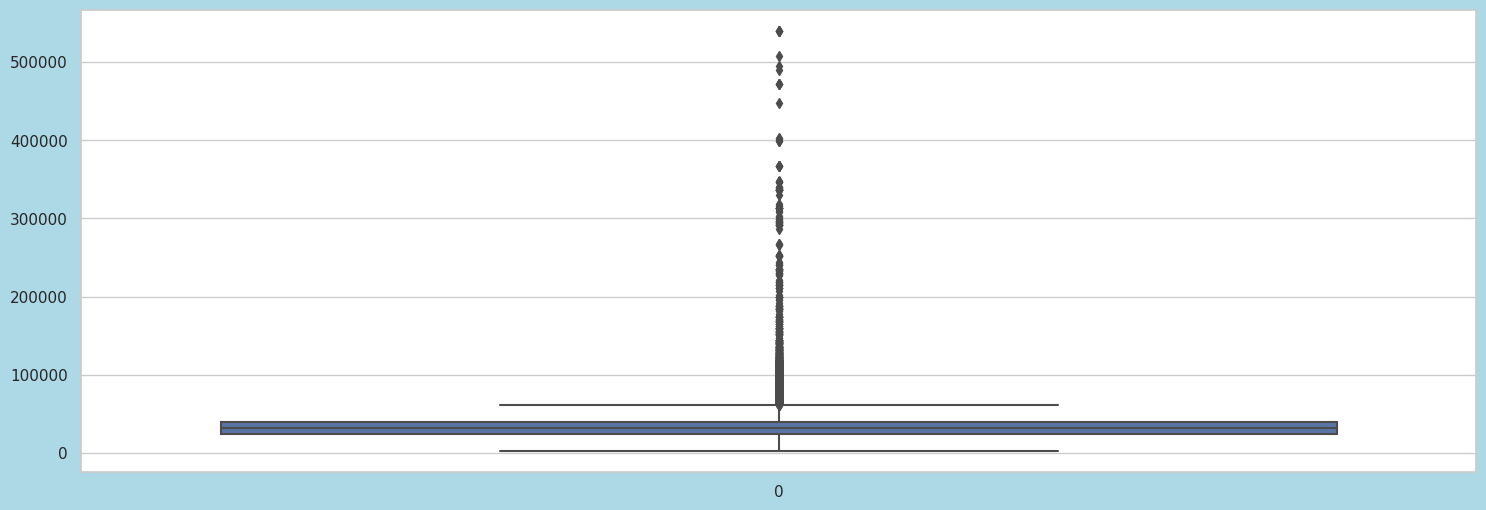

This is Box plot and its details are  Series([], Name: Policy_Sales_Channel, dtype: float64) 



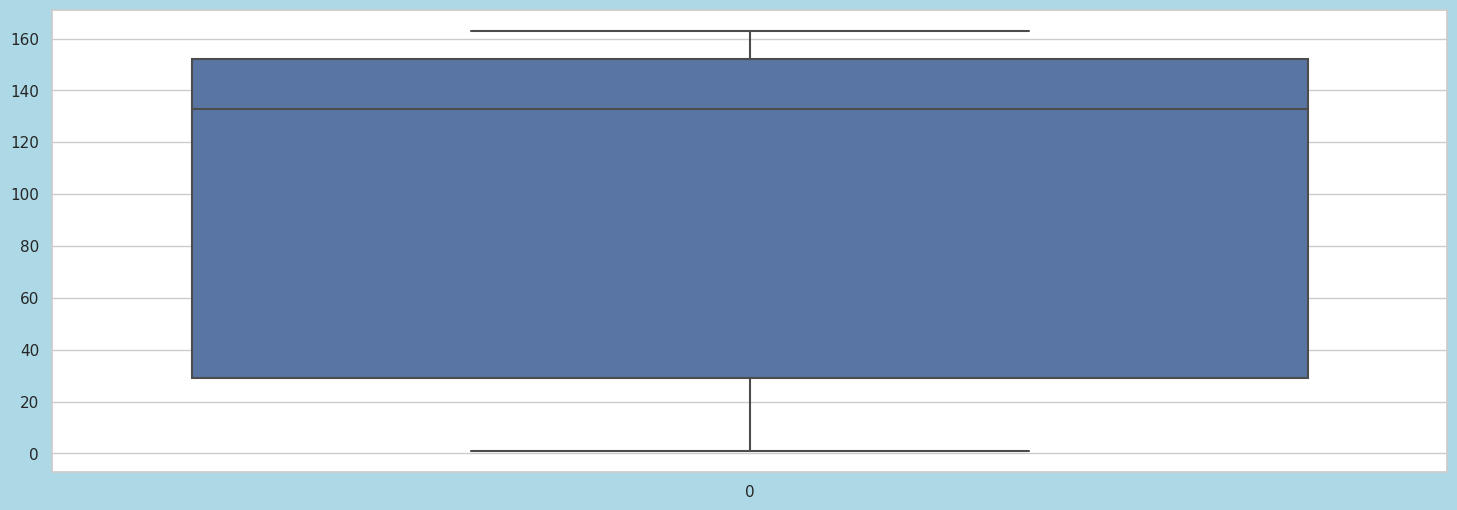

This is Box plot and its details are  Series([], Name: Vintage, dtype: int64) 



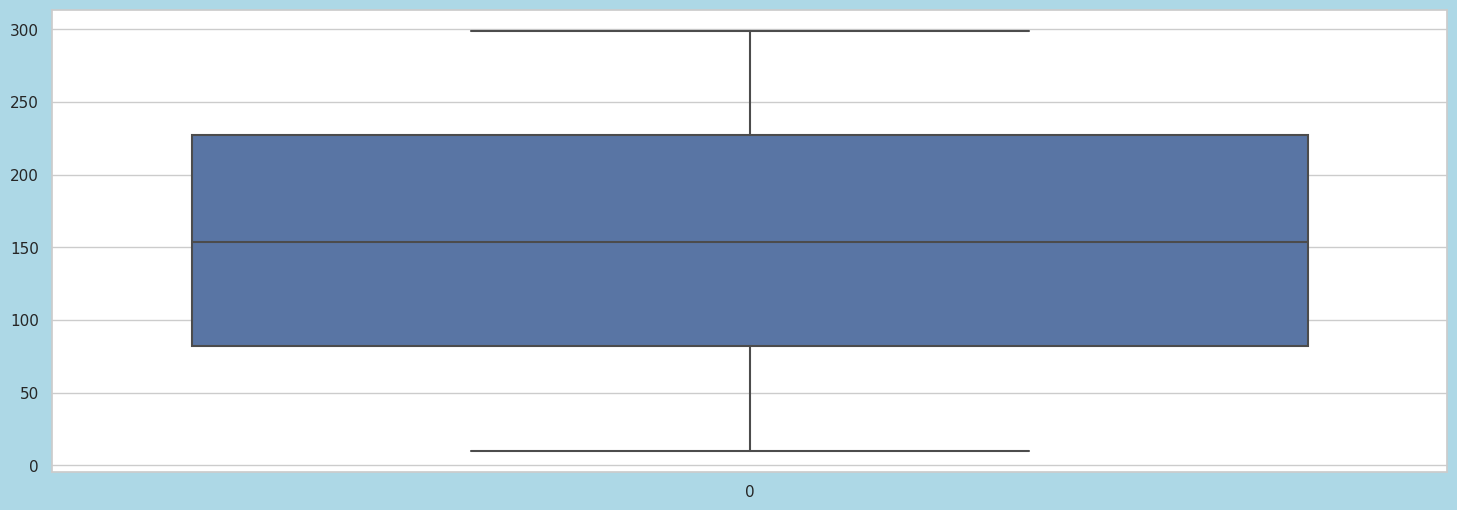

This is Box plot and its details are  Series([], Name: Response, dtype: int64) 



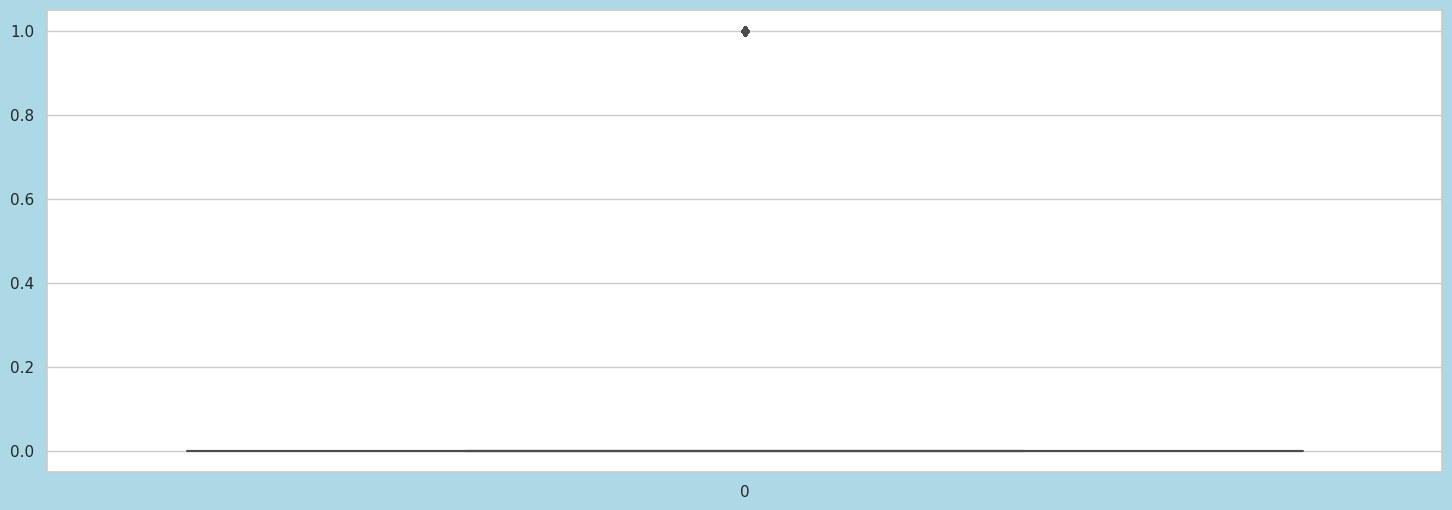

In [21]:
# Chart - 2 visualization code
for values in range(0,len(data.columns)):
  if np.issubdtype(data.iloc[:,values].dtype, np.number):
    fig = plt.figure(figsize=(18,6))
    sns.set(style='whitegrid')
    fig.set_facecolor("lightblue")
    plt.title(print("This is Box plot and its details are ",data.iloc[0:0,values],'\n'))
    sns.boxplot(data.iloc[:,values])
    plt.show()

##### 1. Why did you pick the specific chart?

This box plots shows the five-number summary of the data – the minimum, first quartile, median, third quartile, and maximum.

##### 2. What is/are the insight(s) found from the chart?

Annual_premium contain lot of outliers as shown by boxplot of columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the univariant analysis by box plot the insurance company can take necessary steps to analyse the data to verify the presence of outlier in the data

**Multivariant Analysis**

#### Chart - 3

**Bivariant Analysis **

This is line plot and its details are  Series([], Name: Age, dtype: int64) 



<Axes: xlabel='Age', ylabel='Response'>

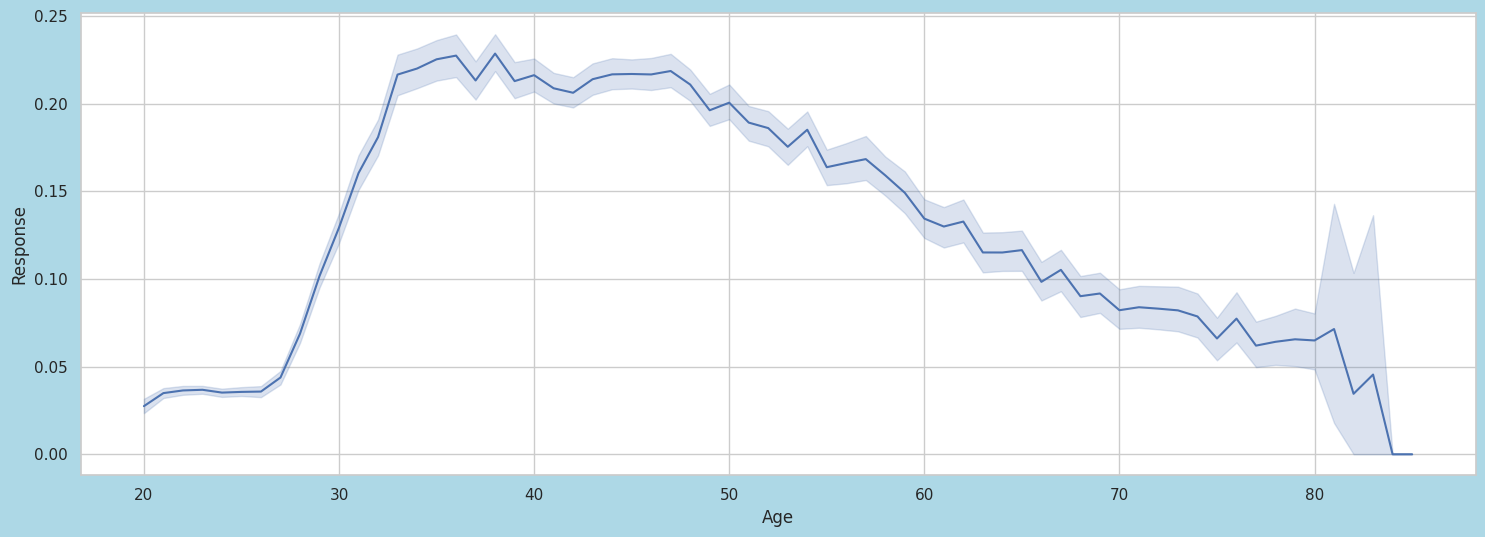

In [22]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is line plot and its details are ",data.iloc[0:0,1],'\n')
sns.lineplot(x=data.iloc[:,1],y=data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

20 to 35 :- we found the response is increasing.

35 to 50 :-  Response is in stalemate.

50 and above :- Response is decreasing with the age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The demand of insurance product is high upto 35 years than company can target customers falling in that age group.

#### Chart - 4

This is bar plot and its details are  Series([], Name: Driving_License, dtype: int64) 



<Axes: xlabel='Driving_License', ylabel='Response'>

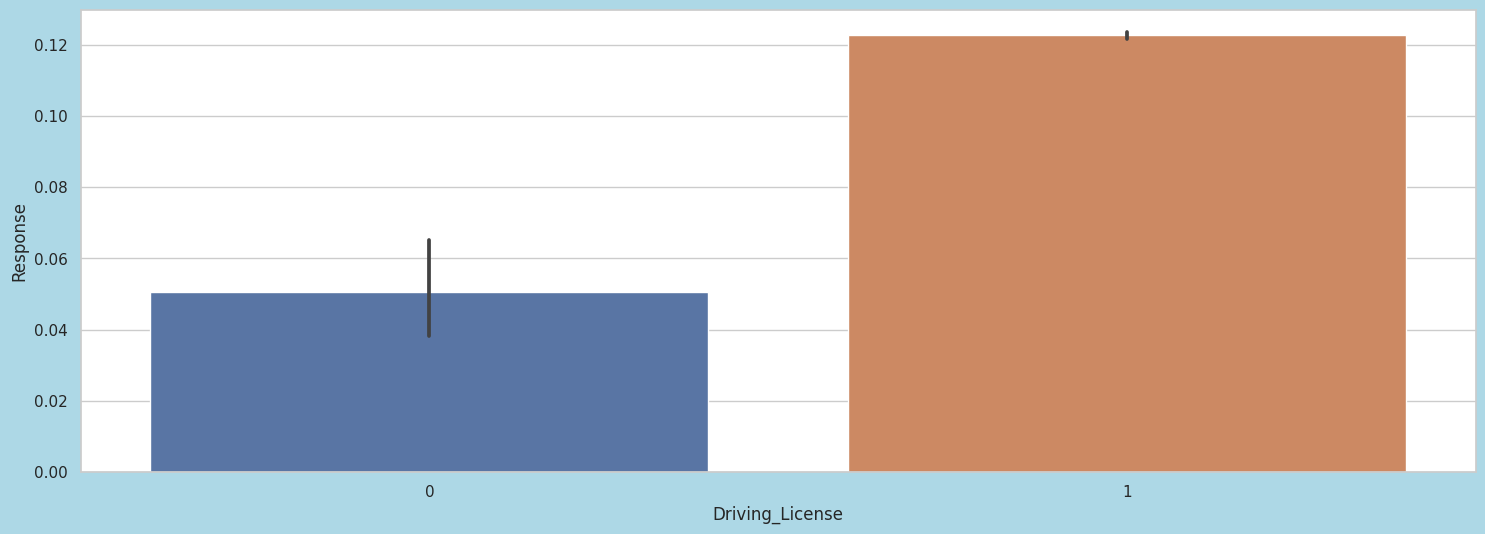

In [23]:
# Chart - 4 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is bar plot and its details are ",data.iloc[0:0,2],'\n')
sns.barplot(x=data.iloc[:,2],y= data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

The person having driving license are more interested in insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can target customers having driving license to increase the sale.

#### Chart - 5

This is line plot and its details are  Series([], Name: Previously_Insured, dtype: int64) 



<Axes: xlabel='Previously_Insured', ylabel='Response'>

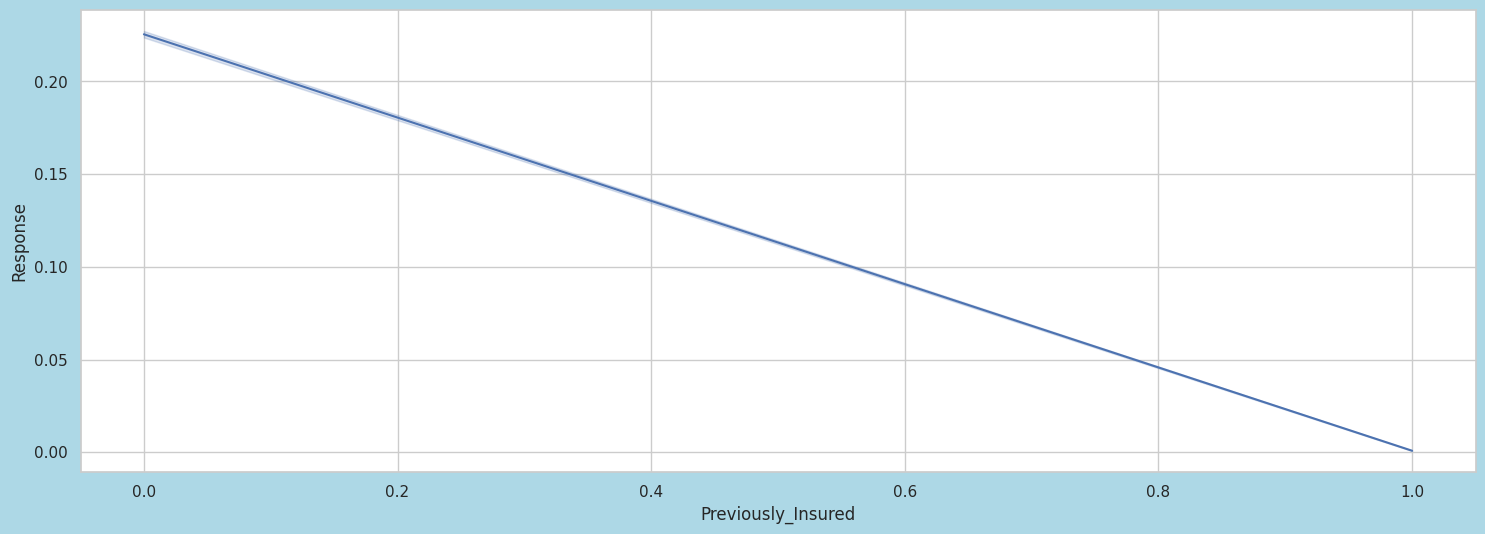

In [24]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is line plot and its details are ",data.iloc[0:0,3],'\n')
sns.lineplot(x=data.iloc[:,3],y=data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

we have found the customers who are not insured previousaly are more responsive than customers having the insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can look into its quality and customer service to improve the response in exiting customers.

#### Chart - 6

This is bar plot and its details are  Series([], Name: Vehicle_Age, dtype: int64) 



<Axes: xlabel='Vehicle_Age', ylabel='Response'>

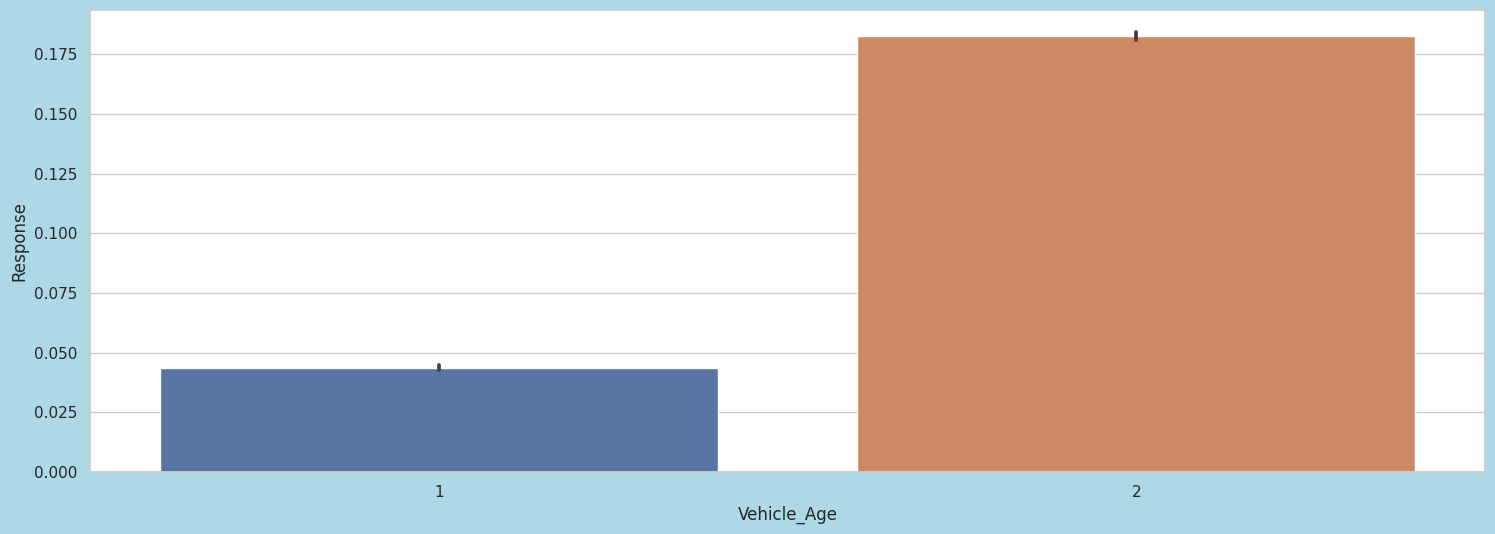

In [25]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is bar plot and its details are ",data.iloc[0:0,4],'\n')
sns.barplot(x=data.iloc[:,4],y=data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

Vehicle older than 2 years are more responsive to the imsurance company than the customer having vehicle less than 2 years of age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance must pay attention to the customer having vehicle age less than 2 years to increase the number of responses.

#### Chart - 7

This is bar plot and its details are  Series([], Name: Vehicle_Damage, dtype: object) 



<Axes: xlabel='Vehicle_Damage', ylabel='Response'>

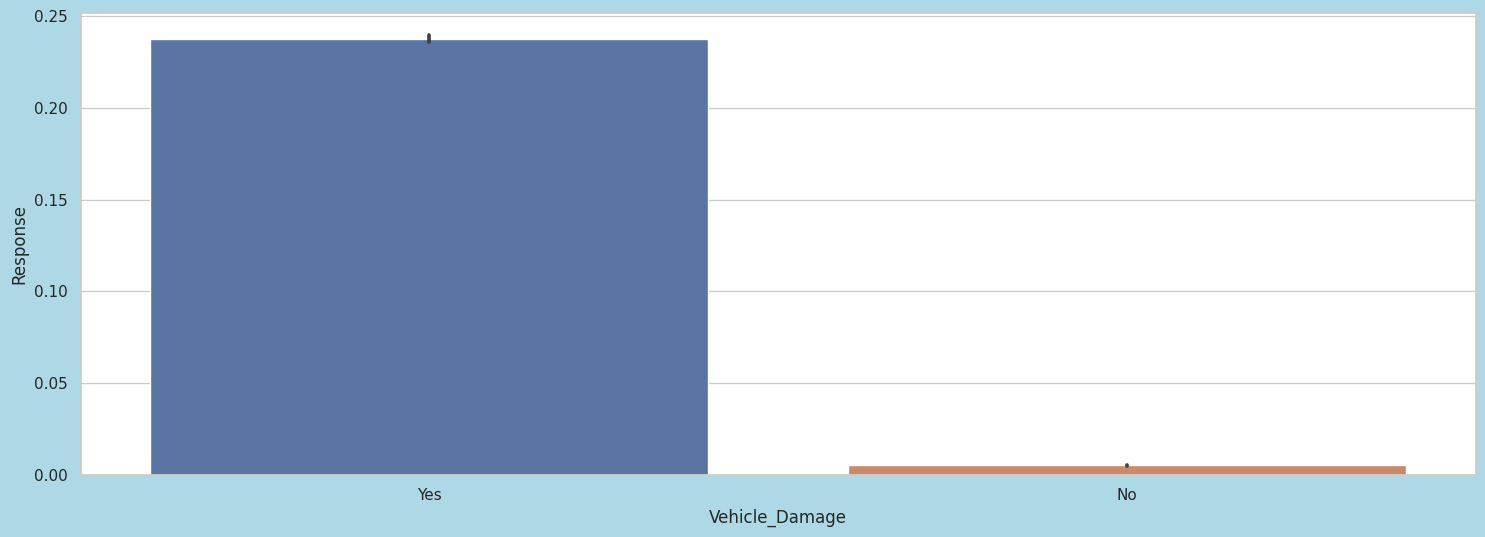

In [26]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is bar plot and its details are ",data.iloc[0:0,5],'\n')
sns.barplot(x=data.iloc[:,5],y = data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

The vehicle met with the accident or having damaged are more responsive to the insurance company.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can run awareness compaign to the vehicle owner with vehicle having no damage to increase sales of the insurance product.

#### Chart - 8

This is line plot and its details are  Series([], Name: Annual_Premium, dtype: float64) 



<Axes: xlabel='Annual_Premium', ylabel='Response'>

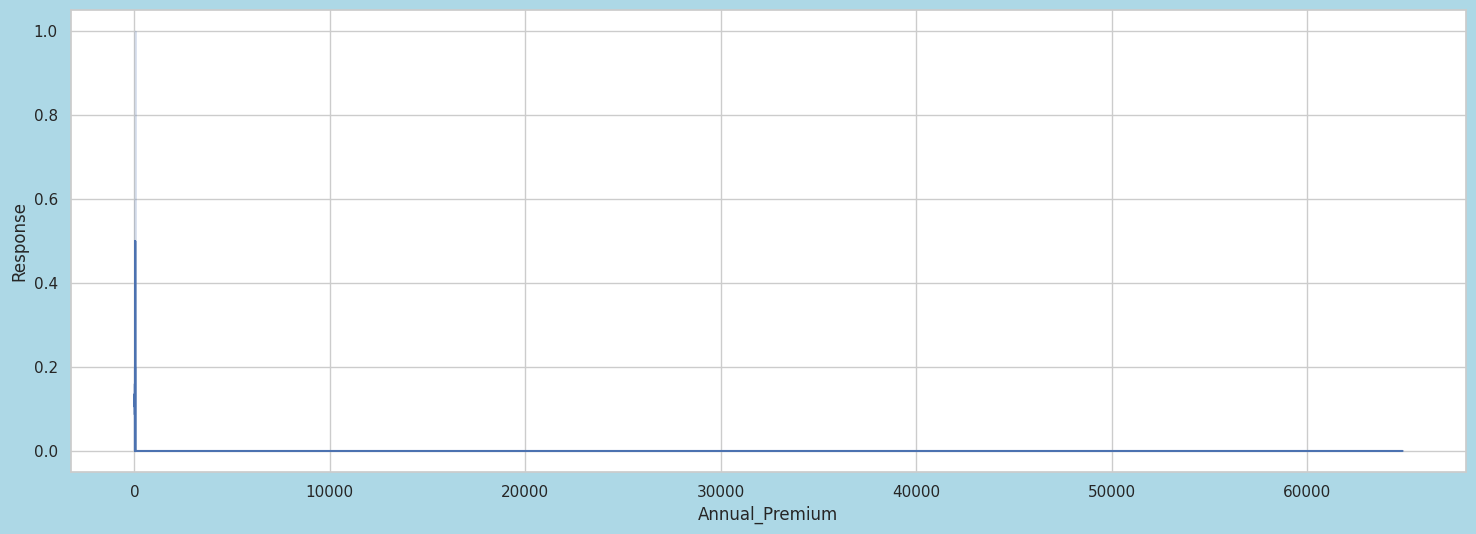

In [27]:
# Chart - 8 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is line plot and its details are ",data.iloc[0:0,6],'\n')
sns.lineplot(x = data.iloc[:,6].value_counts(),y =data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

The need of customer is more dominant to  get response of the customer rather than annual premium.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can manuplate the annual premium to increase the response of the customer.

#### Chart - 9

This is Line plot and its details are  Series([], Name: Policy_Sales_Channel, dtype: float64) 



<Axes: xlabel='Policy_Sales_Channel', ylabel='Response'>

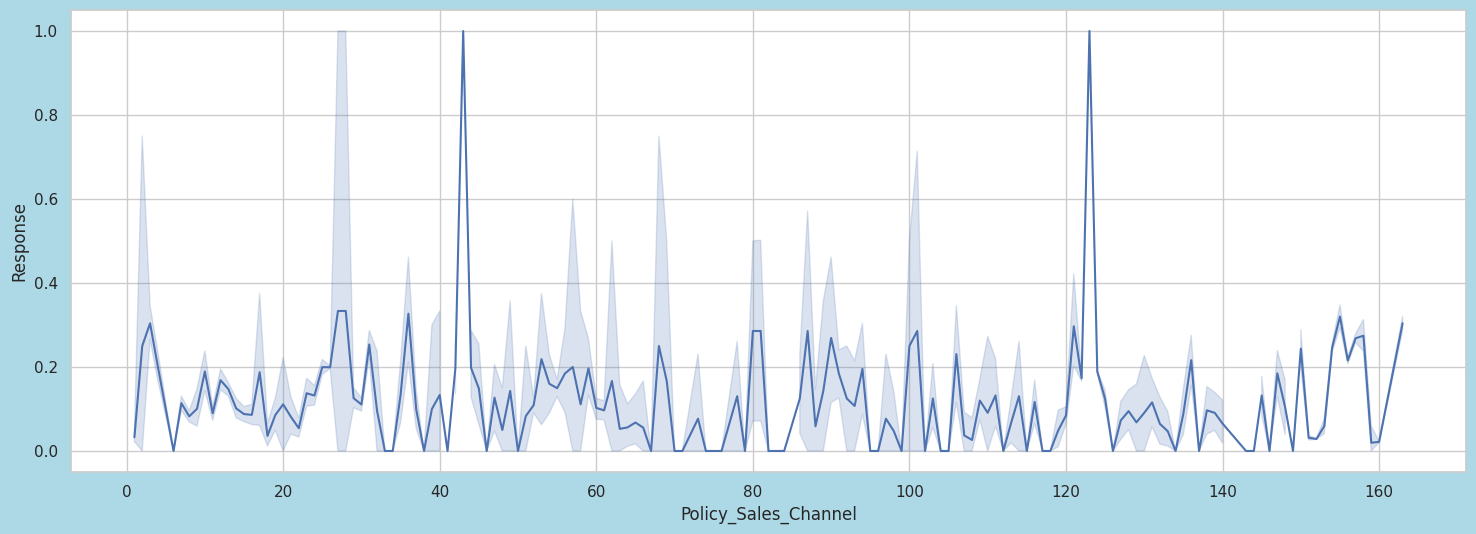

In [28]:
# Chart - 9 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Line plot and its details are ",data.iloc[0:0,7],'\n')
sns.lineplot(x = data.iloc[:,7],y = data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

The agent 40 to 45 and 120 to 125 has more responsive customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can arrange workshops and training session to increase the performance of other insurance agents.

#### Chart - 10

This is Line Plot and its details are  Series([], Name: Vintage, dtype: int64) 



<Axes: xlabel='Vintage', ylabel='Response'>

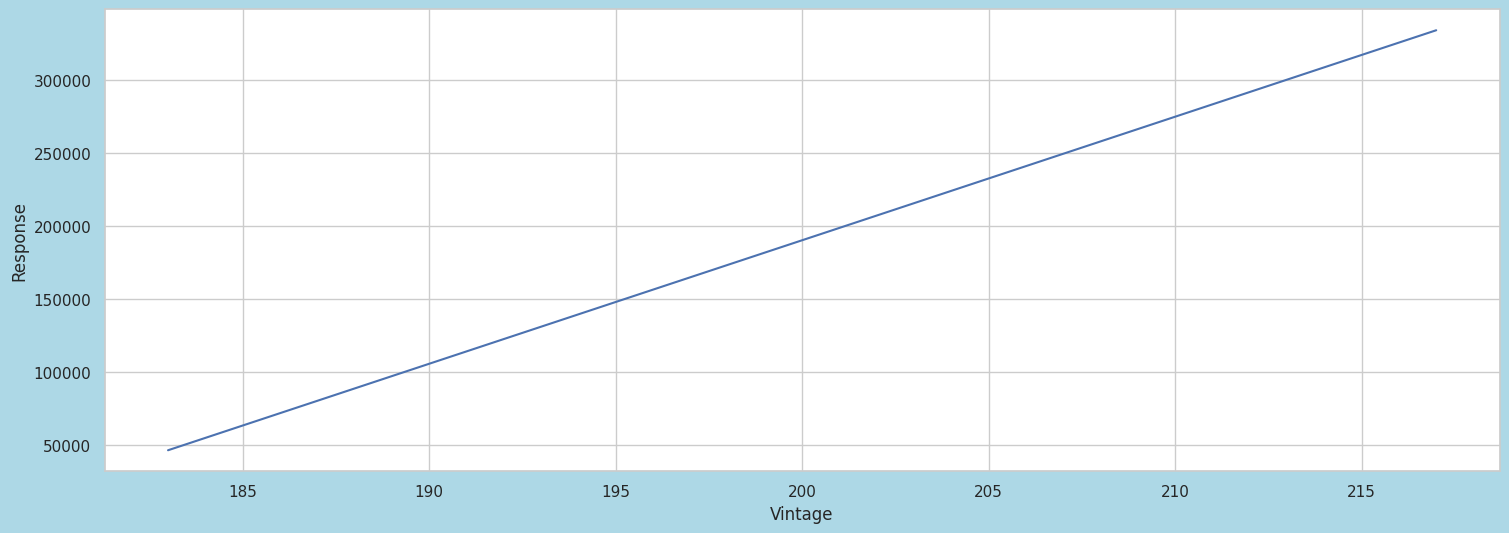

In [29]:
# Chart - 10 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Line Plot and its details are ",data.iloc[0:0,8],'\n')
sns.lineplot(x = data.iloc[:,8],y = data.iloc[:,-1].value_counts())

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

The customer having the more vintage vehicles are more responsive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can look into the market with person having vintage vehicle as they are more responsive so they can increase the sale of the company.

#### Chart - 11 - Correlation Heatmap

In [30]:
newdata = data.drop(['Gender','Vehicle_Damage'],axis=1)

<Axes: >

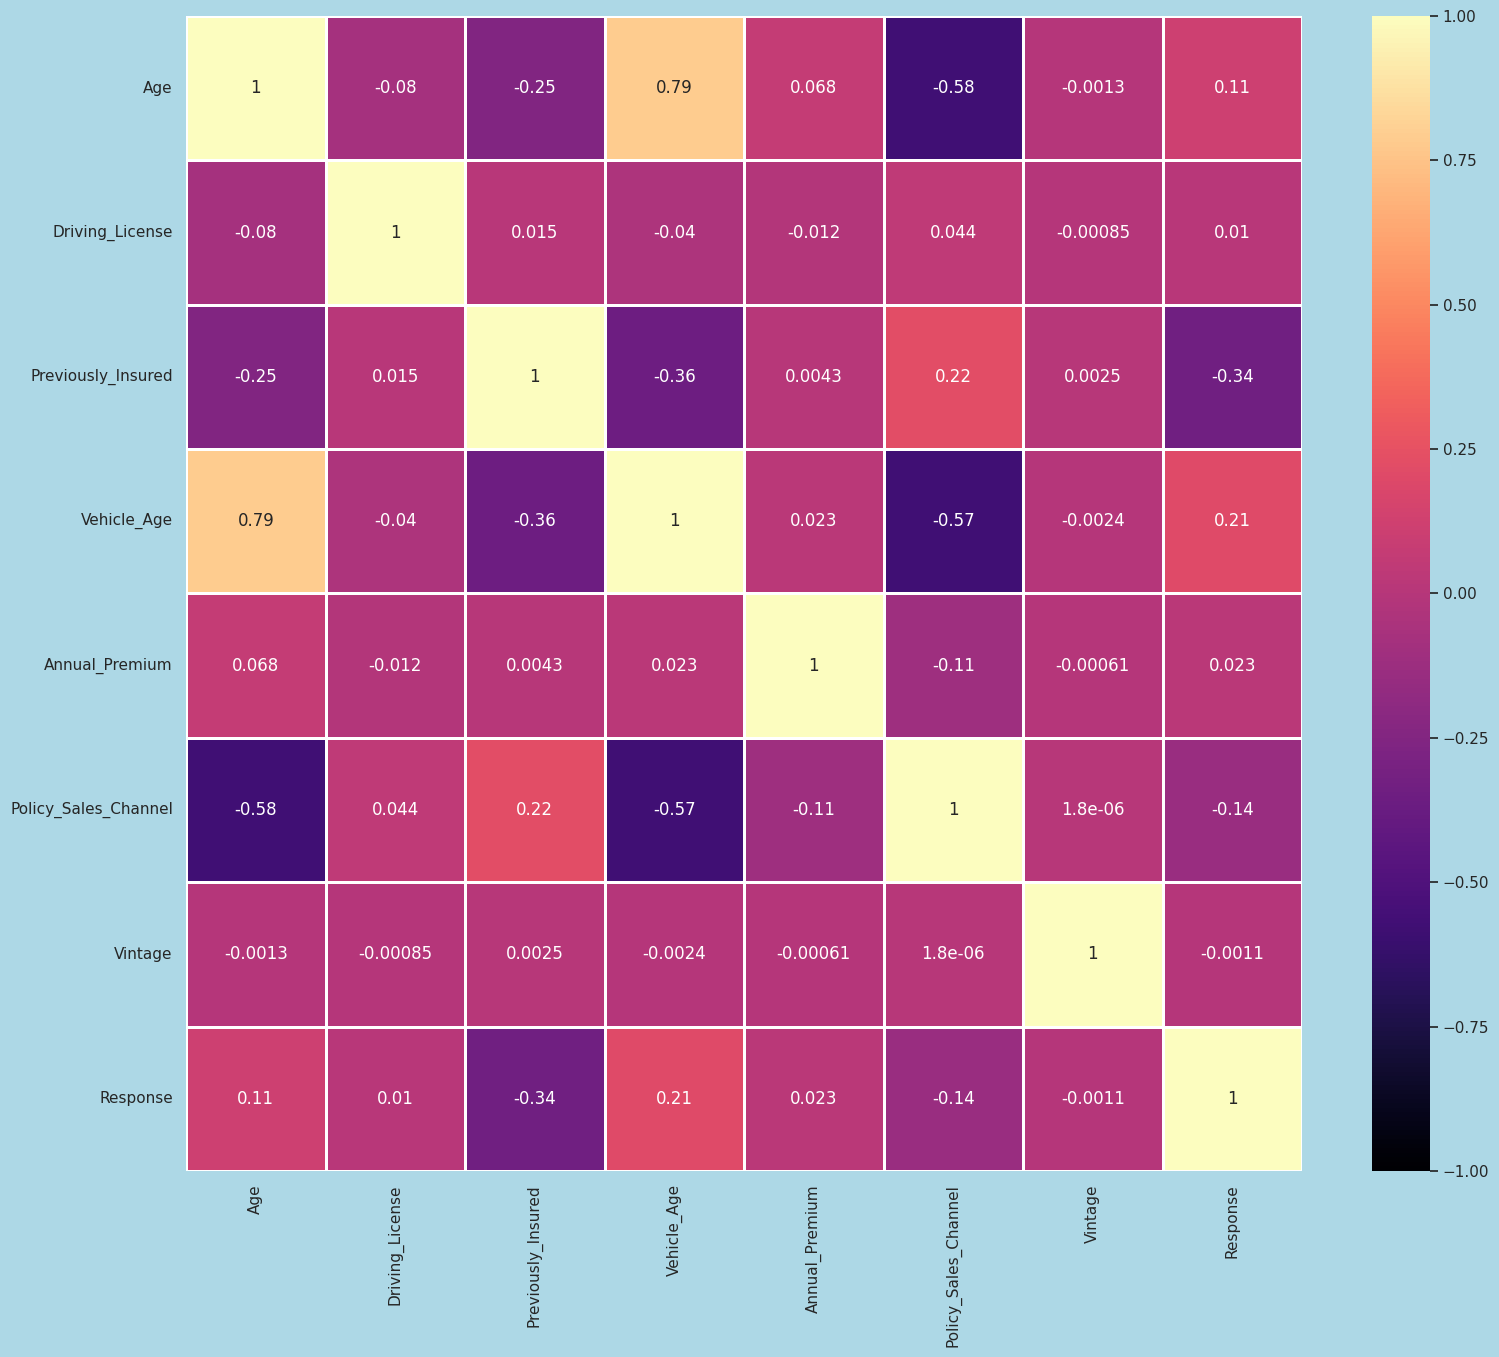

In [31]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(18,15))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.heatmap(data.corr(),vmin=-1,vmax=1, annot=True, cmap='magma', linewidths=0.8)

##### 1. Why did you pick the specific chart?

Heat Maps are graphical representations of data that utilize color-coded systems. The primary purpose of this Heat Map is to better visualize collinearity of the columns within the dataset and assist us towards understanding the linear collinearlity.

##### 2. What is/are the insight(s) found from the chart?

Age and policy_sales_channel are negatively correlated by 0.58.It shows the person with more age reluctant to join sales channel.

Policy_sales_channel and vehicle_age are negatively correlated by 0.57.It shows sales agency does not promote the sale  of insurance to the old vehicle.

#### Chart - 12 - Pair Plot

This is pair plot 



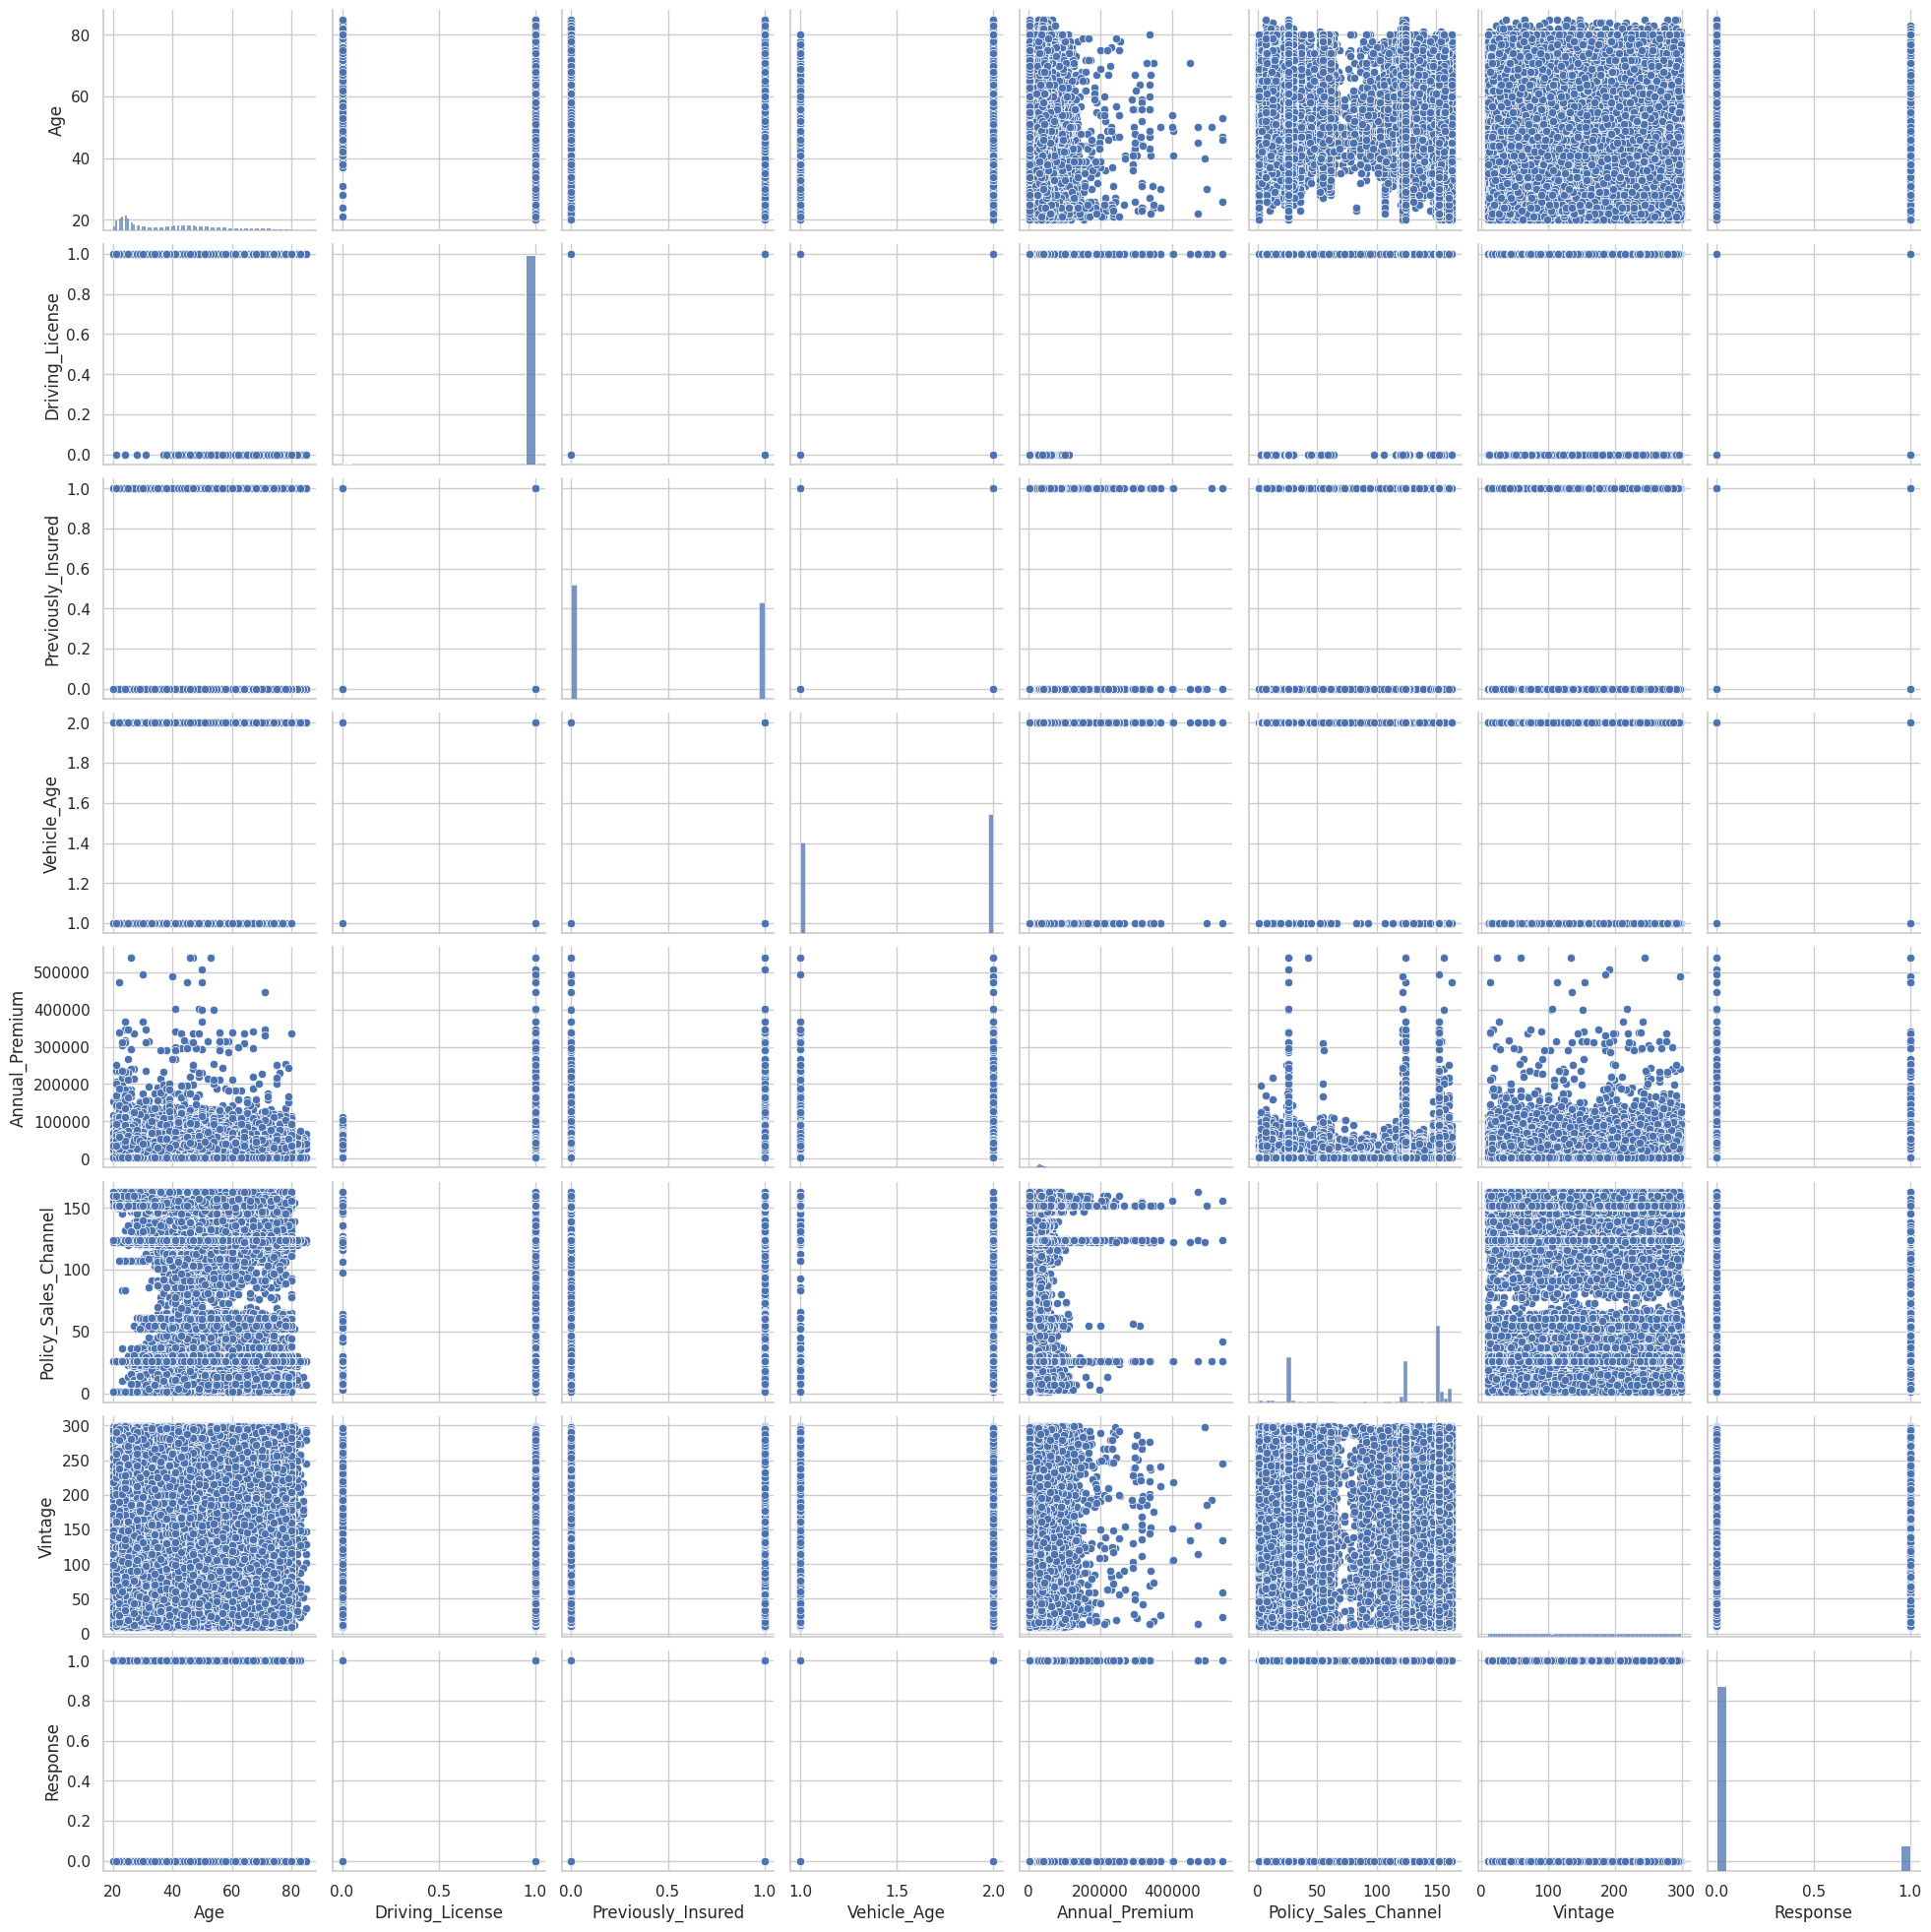

In [32]:
# Pair Plot visualization code
print("This is pair plot \n")
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot we can see that law of collinearity exits or all the independent variables do not depend on each other or there is no relation between them.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

From the dataset we have applied the hypothesis testing on Age and Previously_Insured column in this we have assumed that Out of customers who are previously insured have age greater than 30.


therefore,

H0 = previously_insured customers have age > 30

Ha =  previously_insured customers have age < 30

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
# Making copy of df_clean_frame
hypothesis=data[['Age','Previously_Insured']].copy()
hypothesis = hypothesis[hypothesis["Previously_Insured"] == 1]

# Group_by duration and target_ages
group_by_= hypothesis['Previously_Insured'].groupby(by=hypothesis['Previously_Insured'])

# Mean of group_by variable
group=group_by_.mean()

# In A and B variable grouping values
one = (hypothesis.loc[hypothesis["Age"] > 30 ]).sum()
print(one)
two = (hypothesis.loc[hypothesis["Age"] < 30]).sum()

# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for Previously_Insured age less than 30 years {} \n Mean for Previously_Insured age more than 30 years {}'.format(Mean1,Mean2))
print('Std deviation for Previously_Insured age less than 30 years {} \n Std deviation for Previously_Insured age more than 30 years {}'.format(SD2,SD1))

Age                   3446785
Previously_Insured      69049
dtype: int64
Mean for Previously_Insured age less than 30 years 1757917.0 
 Mean for Previously_Insured age more than 30 years 1289823.5
Std deviation for Previously_Insured age less than 30 years 1679724.3805340505 
 Std deviation for Previously_Insured age more than 30 years 2388420.0306579242


##### Which statistical test have you done to obtain P-Value?

In [34]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Divide the dataset into two groups - one with trips with a single passenger and another with trips with multiple passengers


# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(one, two, equal_var=False)

print('p-value:', p_val)
print('t-value:', t_stat)

p-value: 0.8438118404044405
t-value: 0.22671190535034952


##### Why did you choose the specific statistical test?

A p-value is a statistical measurement used to validate a hypothesis against observed data. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.

Age                   3446785

Previously_Insured      69049

Mean for Previously_Insured age less than 30 years 1757917.0

Mean for Previously_Insured age more than 30 years 1289823.5

Std deviation for Previously_Insured age less than 30 years 1679724.3805340505

Std deviation for Previously_Insured age more than 30 years 2388420.0306579242

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

p-value: 0.8438118404044405

t-value: 0.22671190535034952


A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

## ***6. Feature Engineering & Data Pre-processing***

In [35]:
data.columns = data.columns.str.strip()

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation
print(data.isnull().value_counts())

Gender  Age    Driving_License  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response
False   False  False            False               False        False           False           False                 False    False       381109
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

As we do not have missing values we do not require any imputation technique

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

we will apply IQR method

In [38]:
for i in range(1,len(data.columns)):
  lower_bound = []
  upper_bound = []

  if np.issubdtype(data.iloc[:,i].dtype, np.number) == True:  # check if column is numerical or not

    q1 = np.percentile(data.iloc[:,i],25)
    q3 = np.percentile(data.iloc[:,i],75)

    IQR = q3 - q1

    lower_bound.insert(i,q1 - (IQR * 1.5))
    upper_bound.insert(i,q3 + (IQR * 1.5))

    df=pd.DataFrame({'index': i,'l' :lower_bound,'u':upper_bound})
print(df)

   index    l    u
0      9  0.0  0.0


### Pre-processing

**Check for the colinearity**

In [39]:
#importing relevant library
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

              variables        VIF
0                   Age  20.405075
1       Driving_License  42.806085
2    Previously_Insured   2.111012
3           Vehicle_Age  32.461594
4        Annual_Premium   4.187440
5  Policy_Sales_Channel   8.076137
6               Vintage   4.373345


<Axes: >

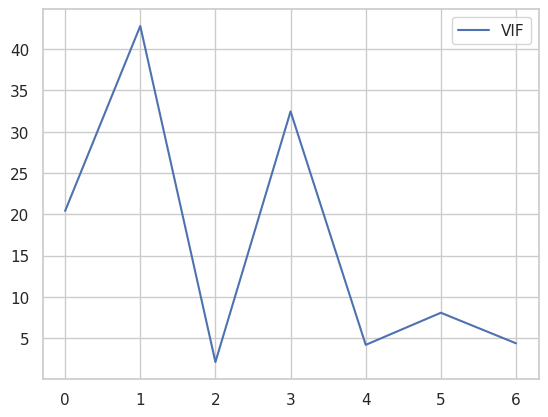

In [40]:
# Calculating VIF for all the columns
print(calc_vif(data[[i for i in data.describe().columns if i not in ['Gender','Vechile_Damage','Response']]]))
(calc_vif(data[[i for i in data.describe().columns if i not in ['Gender','Vechile_Damage','Response']]])).plot()  # We will plot the VIF obtain by the  VIF function.

### 3. Data Splitting

In [41]:
# Split your data to train and test. Choose Splitting ratio wisely.
dependent = data['Response']
independent = data.drop('Response',axis=1)

In [42]:
independent.shape

(381109, 9)

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(independent,dependent,test_size=.3,random_state = 54)

##### What data splitting ratio have you used and why?

We have splitted the data 70:30 where 30 stands for test dataset for checking our accuracy of the model.

## 4. Data Transformation

### Categorical Encoding

In [44]:
# Encode your categorical columns
ohe = OneHotEncoder(drop = 'first', sparse=False, dtype=np.int16, handle_unknown="ignore") # This will convert categorical variable to integer numerical variables.

In [45]:
objectcoders = ['Gender','Vehicle_Damage'] # we will define object type columns here.
numcoders = ['Driving_License', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage']  # we wiil define numericsl columns here.

In [46]:
# Applying Transformer Encoder
transformer = ColumnTransformer(transformers = [
    ('tnfnum', ohe, numcoders),
    ('tnfobj', ohe, objectcoders)
],remainder = 'passthrough')

In [47]:
xtrain = transformer.fit_transform(xtrain) # Fitting transformer Encoder on Xtrain.

In [48]:
xtest = transformer.transform((xtest)) # Applying transformer  encoder on xtest.

In [49]:
xtrain.shape

(266776, 445)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We imported OneHotEncoader and applied nominal categorical transformation on object type columns Gender and Vehicle_Damage

We applied nominal categorical transformation on numerical type columns Driving_License, Previously_Insured , Policy_Sales_Channel and Vintage

### 6. Data Scaling

In [50]:
# Scaling your data
rob = RobustScaler()

In [51]:
xtrain = rob.fit_transform(xtrain)

In [52]:
xtest = rob.transform(xtest)

##### Which method have you used to scale you data and why?

We applied robust scaler on the dataset considering the presence of outliers and it also normalized the data.

## ***7. ML Model Implementation***

### **ML Model - 1 Logistic Regression**

In [53]:
# ML Model - 1 Implementation
lr = LogisticRegression()
# Fit the Algorithm
model1= lr.fit(xtrain,ytrain)
# Predict on the model
ypred = lr.predict(xtest)
print(ypred)

[0 0 0 ... 0 0 0]


<Axes: ylabel='Response'>

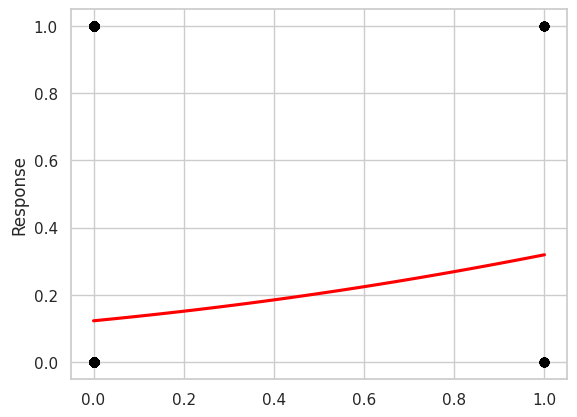

In [54]:
sns.regplot(x=ypred, y=ytest, data=data, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<Axes: xlabel='Response', ylabel='Density'>

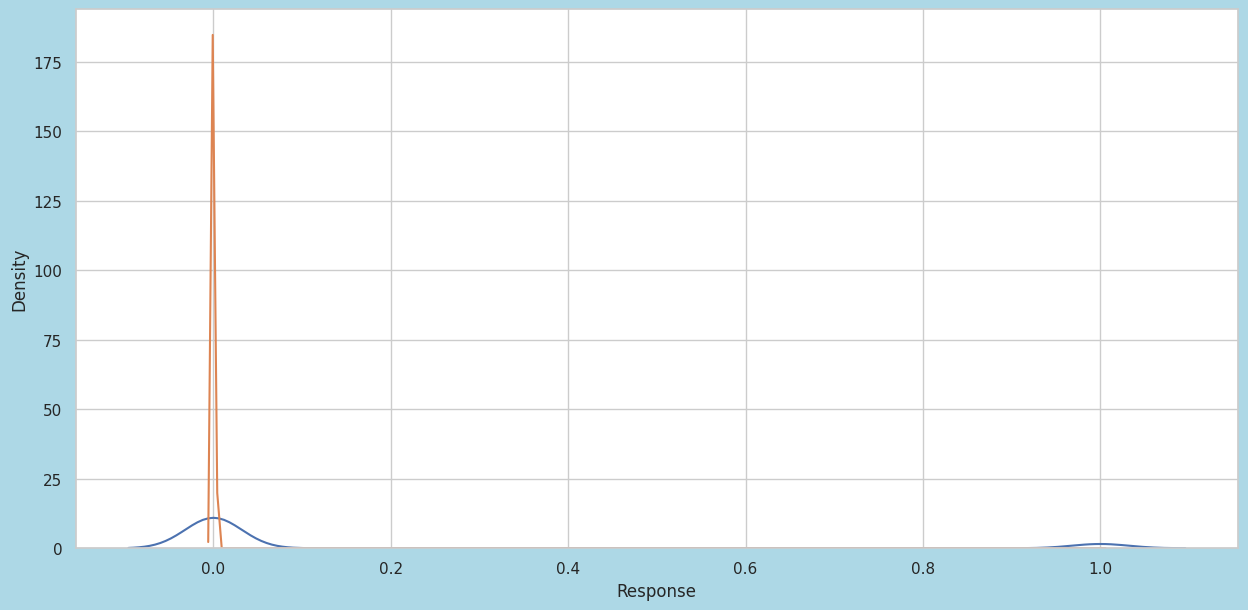

In [55]:
fig = plt.figure(figsize=(15,7))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.kdeplot(ytest)
sns.kdeplot(ypred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

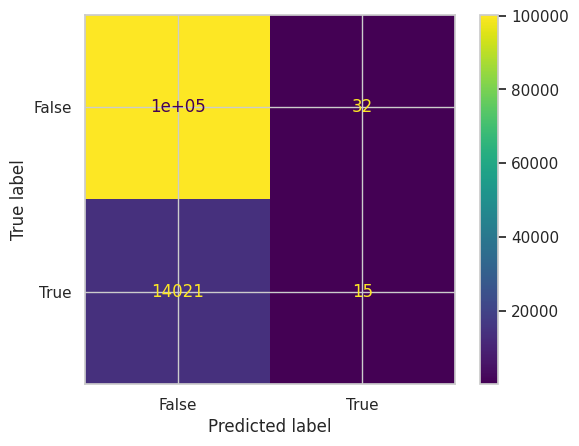

<Figure size 700x700 with 0 Axes>

In [56]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix(ytest, ypred)

actual = ytest
predicted = ypred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.figure(figsize=(7,7))
plt.show()

In [57]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.8770871052102193


In [58]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.3191489361702128


In [59]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall)

0.0010686805357651753


In [60]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity)

0.9996809475856706


In [61]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score)

0.0021302279343889795


We started with the Confusion matrix and then explained the various results associated with it

Accuracy 0.87

Precision 0.31

Sensitivity recall 0.001

Specificity 0.99


We calculated the F1 score 0.0021

### **ML Model - 2 Decision Tree**

In [62]:
tree = DecisionTreeClassifier(min_samples_leaf=20,criterion='entropy', random_state=20)
tree.fit(xtrain, ytrain)
print("Regresion Model Score" , ":" , tree.score(xtrain, ytrain) , "\n" ,
      "Out of Sample Test Score" ,":" , tree.score(xtest, ytest))
print("\n")
yl_predicted = tree.predict(xtrain)
yl_test_predicted = tree.predict(xtest)

Regresion Model Score : 0.8843486670465109 
 Out of Sample Test Score : 0.8660579185362056




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We selected the decision Tree for the purpose of the classification and its metrics score are

Regresion Model Score : 0.8843486670465109 on train

 Out of Sample Test Score : 0.8660579185362056 on test

<Axes: xlabel='Response', ylabel='Density'>

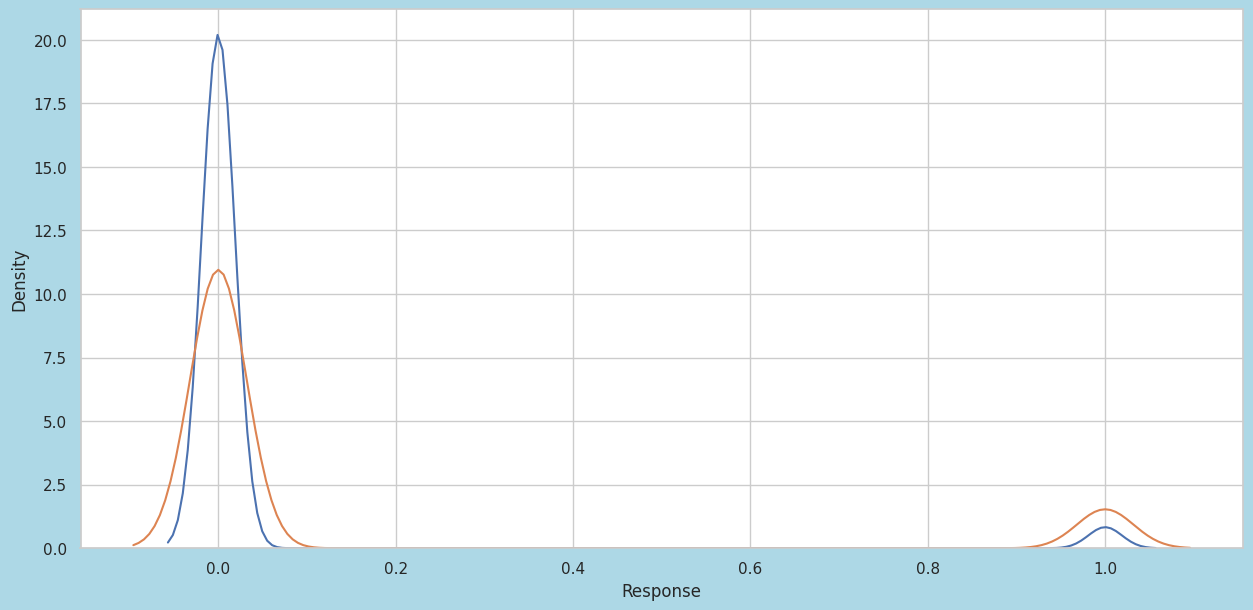

In [63]:
fig = plt.figure(figsize=(15,7))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.kdeplot(yl_test_predicted)
sns.kdeplot(ytest)

In [64]:
featurenames = pd.DataFrame() # creating an empty dataframe
featurenames['names'] = pd.DataFrame(transformer.get_feature_names_out()) # saving feature names of columns in dataframe

                                  names     score
441          tnfobj__Vehicle_Damage_Yes  0.596066
444           remainder__Annual_Premium  0.145232
442                      remainder__Age  0.117539
1          tnfnum__Previously_Insured_1  0.071471
141  tnfnum__Policy_Sales_Channel_152.0  0.011049
149  tnfnum__Policy_Sales_Channel_160.0  0.009412
440                 tnfobj__Gender_Male  0.009132
25    tnfnum__Policy_Sales_Channel_26.0  0.006704
116  tnfnum__Policy_Sales_Channel_124.0  0.004208
145  tnfnum__Policy_Sales_Channel_156.0  0.002587


<Axes: >

<Figure size 640x480 with 0 Axes>

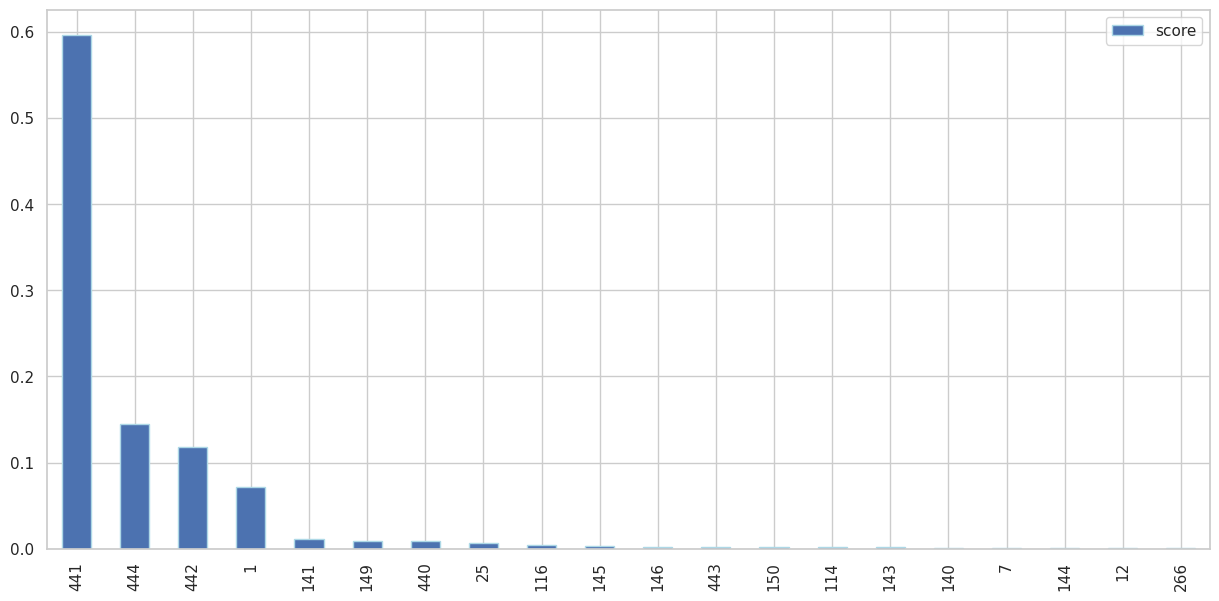

In [65]:
# get importance
importance = tree.feature_importances_

# summarize feature importance
featurenames['score'] = importance

# plot feature importance
fig = plt.figure(linewidth=10,edgecolor="lightblue")
print(featurenames[['names','score']].nlargest(10,'score'))
(featurenames[['names','score']].nlargest(20,'score')).plot(kind='bar',figsize=(15,7),style='whitegrid', edgecolor=fig.get_edgecolor())

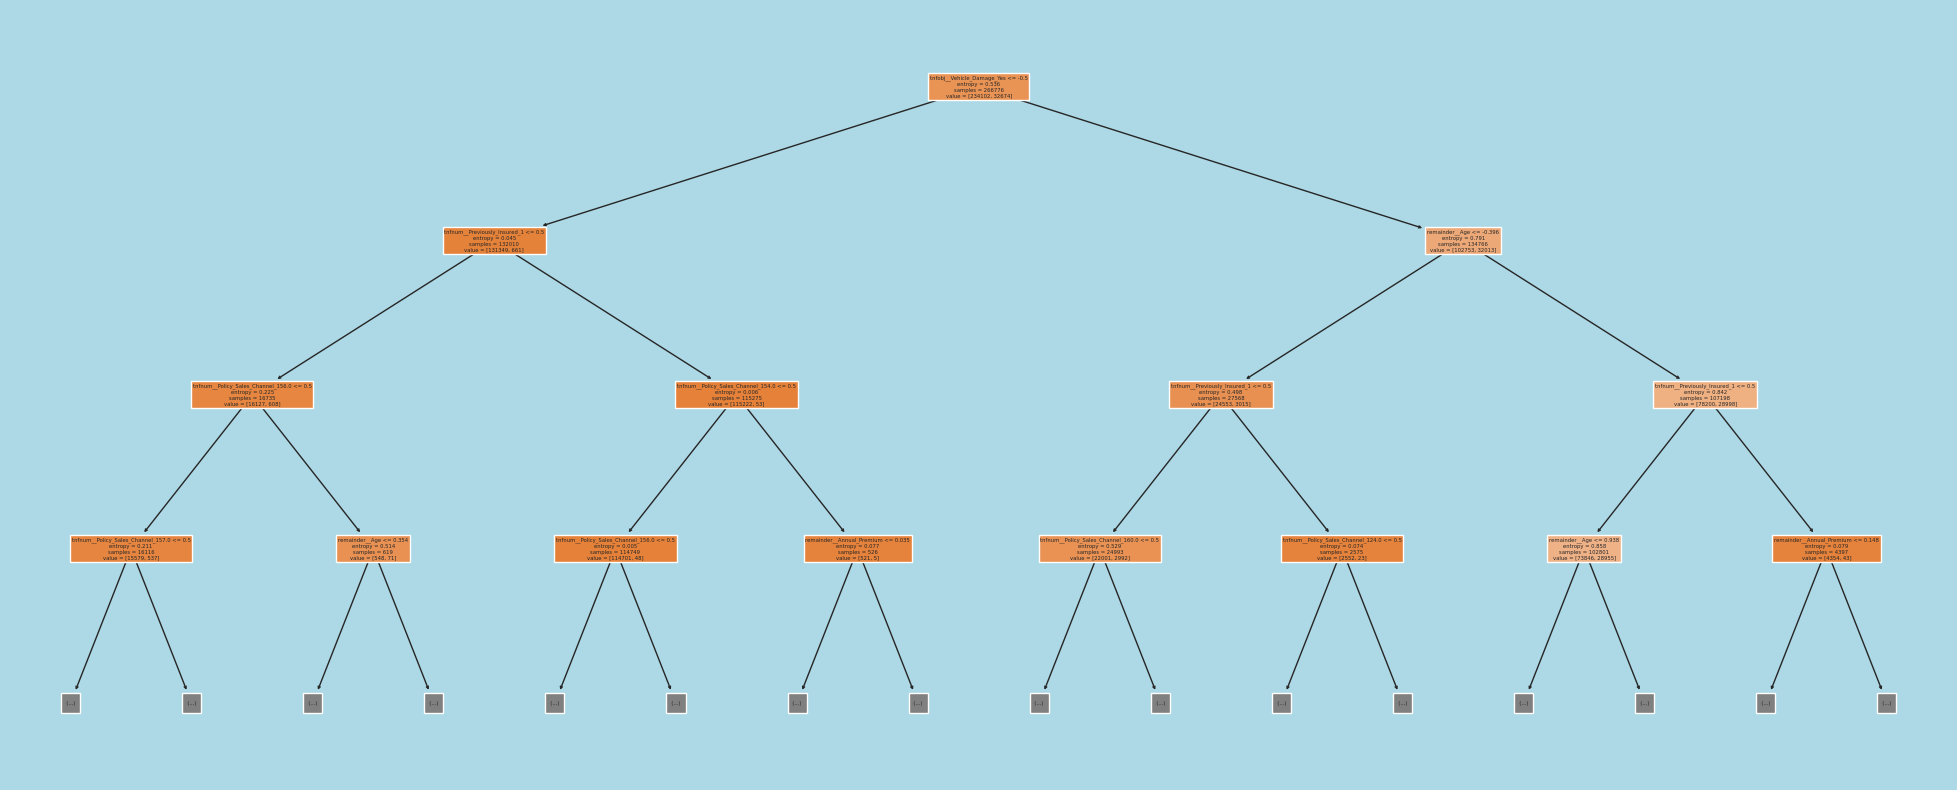

In [66]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,10))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
plot_tree(tree,max_depth=3,filled = True, feature_names=featurenames['names'])
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Plotting the feature Graph we can see these are the importand feature for the insurance company.

441          tnfobj__Vehicle_Damage_Yes  0.596066

444           remainder__Annual_Premium  0.145232

442                      remainder__Age  0.117539


So the insurance company can alter the sales by understanding the columns or features.

### **ML Model - 3 RandomForestClassifier**

In [67]:
rdf = RandomForestClassifier(n_estimators = 100, max_depth = 50, max_features = 150, bootstrap = True, random_state = 18)
rdf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=50, max_features=50, n_estimators=5,
                       random_state=18)

In [68]:
print("Regresion Model Score" , ":" , rdf.score(xtrain, ytrain) , "\n" ,
      "Out of Sample Test Score" ,":" , rdf.score(xtest, ytest))
print("\n")


Regresion Model Score : 0.9063221579152547 
 Out of Sample Test Score : 0.8697401450150001




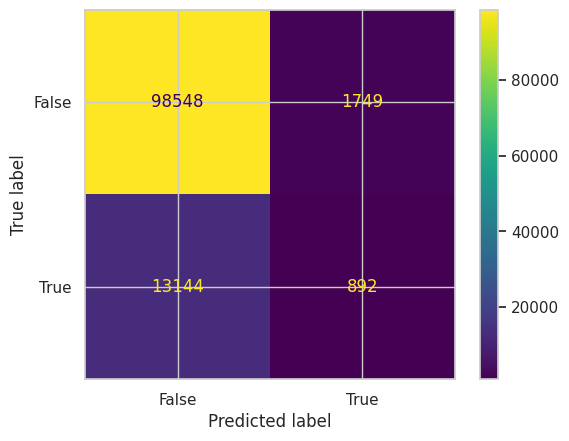

accuracy score 0.8697401450150001
F1 score 0.10697367632068117


In [69]:
# Create our predictions
yr_test_predicted = rdf.predict(xtest)

# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(ytest, yr_test_predicted)
actual = ytest
predicted = yr_test_predicted

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

plt.show()

# Display accuracy score
accuracy = accuracy_score(ytest, yr_test_predicted)
print('accuracy score',accuracy)

# Display F1 score
f1score = f1_score(ytest, yr_test_predicted)
print("F1 score",f1score)

<Axes: xlabel='Response', ylabel='Density'>

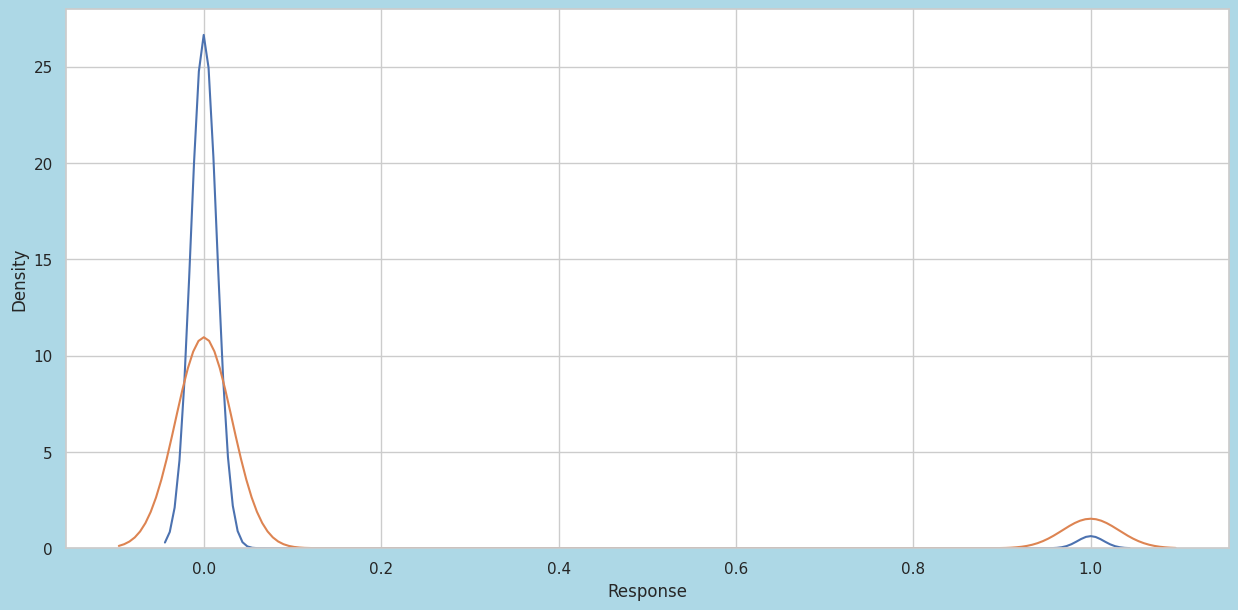

In [70]:
fig = plt.figure(figsize=(15,7))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.kdeplot(yr_test_predicted)
sns.kdeplot(ytest)

                                  names     score
442                      remainder__Age  0.171207
1          tnfnum__Previously_Insured_1  0.146411
444           remainder__Annual_Premium  0.140407
441          tnfobj__Vehicle_Damage_Yes  0.114123
443              remainder__Vehicle_Age  0.026325
141  tnfnum__Policy_Sales_Channel_152.0  0.023651
440                 tnfobj__Gender_Male  0.021405
116  tnfnum__Policy_Sales_Channel_124.0  0.012973
149  tnfnum__Policy_Sales_Channel_160.0  0.011041
25    tnfnum__Policy_Sales_Channel_26.0  0.005257


<Axes: >

<Figure size 640x480 with 0 Axes>

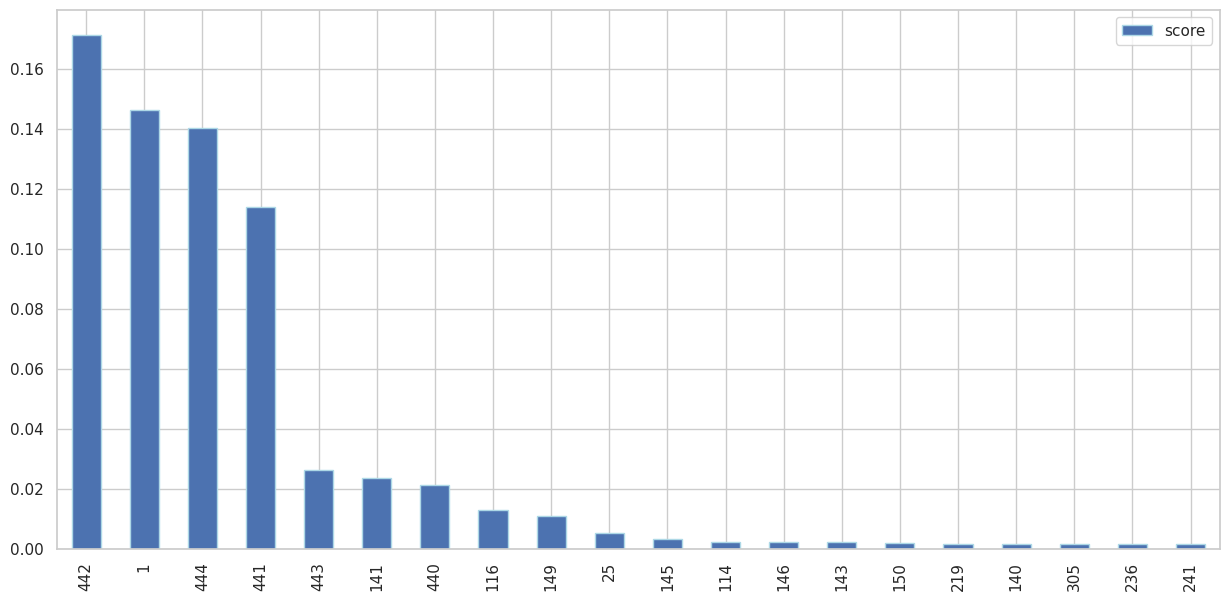

In [71]:
# get importance
importance = rdf.feature_importances_

# summarize feature importance
featurenames['score'] = importance

# plot feature importance
fig = plt.figure(linewidth=10,edgecolor="lightblue")
print(featurenames[['names','score']].nlargest(10,'score'))
(featurenames[['names','score']].nlargest(20,'score')).plot(kind='bar',figsize=(15,7),style='whitegrid', edgecolor=fig.get_edgecolor())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# parameters = {
#     "n_estimators":[5,10,50,100,250],
#     "max_depth":[2,4,8,16,32,40,50,60,None]

# }
parameters = {
    "n_estimators":[5,100],
    "max_depth":[4,50],
    "max_features" : [50]
}

##### Which hyperparameter optimization technique have you used and why?

Grid search CV is a technique that searches the best parameters for a model from a grid of given parameters. It uses cross-validation to evaluate the performance of each combination of parameters. Grid search CV can be time-consuming and expensive with many hyperparameters involved

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rdf,parameters,cv=3)

# Fit the Algorithm
cv.fit(xtrain,ytrain)
# Predict on the model
cv.best_params_

{'max_depth': 4, 'max_features': 50, 'n_estimators': 5}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From regress hyperparameter optimization we found

  "n_estimators":[100],

  "max_depth":[50]

is best suited parameter and gives best result

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Confusion_matrix**

Classification is the process of categorizing a given set of data into classes.
In Machine Learning(ML), you frame the problem, collect and clean the data, add some necessary feature variables(if any), train the model, measure its performance, improve it by using some cost function, and then it is ready to deploy.

**Accuracy_score ()**

function takes the true labels and the predicted labels as arguments and returns the accuracy as a float value. sklearn.metrics comes with a number of useful functions to compute common evaluation metrics.

**F1 score**
The F1 score is the harmonic mean of precision and recall, as shown by the formula: F1 = 2 * (precision * recall) / (precision + recall)

In [74]:
# Visualizing evaluation Metric Score chart

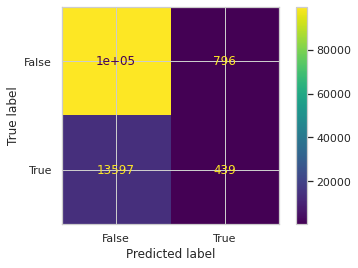

accuracy score 0.8741133356073925


F1 score 0.057494597603300376

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy_score ()

function takes the true labels and the predicted labels as arguments and returns the accuracy as a float value. sklearn.metrics comes with a number of useful functions to compute common evaluation metrics.

accuracy score 0.8741133356073925

F1 score The F1 score is the harmonic mean of precision and recall, as shown by the formula: F1 = 2 * (precision * recall) / (precision + recall)

F1 score 0.057494597603300376

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We will go with Random Forest Classifier as it is more accurate and it gives details about the feature which is more important for desicion making by the management to improve the service and sales.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

                     names     score

444           remainder__Annual_Premium  0.148969

442                      remainder__Age  0.142113

441          tnfobj__Vehicle_Damage_Yes  0.134771

1          tnfnum__Previously_Insured_1  0.107975

141  tnfnum__Policy_Sales_Channel_152.0  0.027858

440                 tnfobj__Gender_Male  0.021654

443              remainder__Vehicle_Age  0.017280

116  tnfnum__Policy_Sales_Channel_124.0  0.009969

25    tnfnum__Policy_Sales_Channel_26.0  0.007524

149  tnfnum__Policy_Sales_Channel_160.0  0.007474


We plotted feature importance to get the important features shown above.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File
filename = 'regression_model.sav'
pickle.dump(rdf, open(filename, 'wb'))

# load the model
load_model = pickle.load(open(filename, 'rb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.
y_pred = load_model.predict(xtest)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We employed various Classification models, including Logistic Regression and Decision Tree Forest. Among these models, the Random Forest Classifier proved to be the most suitable for our dataset.

Within the Random Forest Classifier, we achieved an accuracy rate of 87%, and it also provided insights into the crucial features.

To gain a deeper understanding of why specific models performed well with this dataset, it is essential to examine the relationship between the observed and target variables.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***